<a href="https://colab.research.google.com/github/Abhijith-S-D/Spotify-EDA/blob/main/Spotify_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Exploratory Data Analysis (EDA) on the Spotify Dataset 🎹

**Python for Data Science Mini Project**

By,
* **Abhijith S D**
* **Arvind C R**
* **Ayyasamy S**
* **Gurumurthy Kalyanpur Viswanathaiah**
* **Manjunath**

## ✨ Introduction ✨
Welcome to the Exploratory Data Analysis (EDA) of the Spotify dataset! In this notebook, we will explore various aspects of the dataset to uncover insights and understand the underlying patterns.

## 📚 Libraries Used 🔧

### 🔬 chardet
* **Purpose**: Determine the encodings of files
* **Usage**: To understand the charset of the kaggle dataset [pypi-url](https://pypi.org/project/chardet/)

### 😶 missingno
* **Purpose**: Missing data visualization module for Python.
* **Usage**: To visualize the null values easily [git-url](https://github.com/ResidentMario/missingno)

### 🐍 Pandas
* **Purpose**: Data manipulation and analysis.
* **Usage**: To handle and process data, including reading and cleaning the dataset.

### 📊 Seaborn
* **Purpose**: Statistical data visualization.
* **Usage**: To create informative and attractive visualizations such as histograms, pair plots, and violin plots.

### 🖼️ Matplotlib
* **Purpose**: Plotting and visualization.
* **Usage**: For creating static, animated, and interactive visualizations, including histograms and plots with customized styles.

### 📈 Plotly
* **Purpose**: Interactive data visualization.
* **Usage**: To create interactive plots and visualizations that allow for deeper exploration of the data.

### ⚠️ Warnings
* **Purpose**: Manage warnings.
* **Usage**: To suppress warnings that may clutter the output.

In [48]:
!pip install chardet missingno

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

import missingno as msno
import chardet
import calendar

import warnings
warnings.filterwarnings(
    action="ignore",
    category=FutureWarning,
    module=r"plotly\.express\._core",
)

# 📋 Step1 - Selected Dataset Overview and Preprocessing 🔍

## 📈 Data Setup linking kaggle and google colab


### 📰 Read the kaggle API token to interact with your kaggle account

### ⚙️ Series of commands to set-up for download

### ♿ giving rw access (if 401-nathorized)

### ✅ Sanity check if able to access kaggle

### ⬇️ Download data command

### 🤐 Unzip Dataset

In [49]:
from google.colab import files
files.upload()
!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle datasets download -d nelgiriyewithana/most-streamed-spotify-songs-2024
!unzip most-streamed-spotify-songs-2024.zip

Saving kaggle.json to kaggle.json
-rw-r--r-- 1 root root 69 Sep 18 03:49 kaggle.json
/content
ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                          Student Performance Factors                          94KB  2024-09-02 10:53:57           8180        176  1.0              
ironwolf404/laptop-price-dataset                                 Laptop Price - dataset                               25KB  2024-09-02 18:11:19           1495         26  1.0              
hanaksoy/customer-purchasing-behaviors                           Customer Purchasing Behaviors                         1KB  2024-09-01 22:18:07       

## 👁️‍🗨️ Read Dataset to determine the encoding 🗂️

Use chardet to determine the encoding of the dataset

In [50]:
file_path = 'Most Streamed Spotify Songs 2024.csv'
with open(file_path, 'rb') as file:
    data = file.read(5000)
    result = chardet.detect(data)
    encoding = result['encoding']
    print(f"Detected encoding: {encoding}")

Detected encoding: ISO-8859-1


## 🗂️ Loading the Dataset 📥

We began by loading the [Most Streamed Spotify Songs 2024](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024) dataset using `pandas`. This dataset contains information about various tracks, including metrics from different streaming platforms.

In [51]:
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

## 🏷️ Initial Data Examination 👀
We reviewed the last few rows of the dataset to understand its structure and content. The dataset consists of 29 columns and 4599 rows with diverse types of information such as track names, artists, release dates, and various streaming metrics.

In [52]:
pd.reset_option('display.max_columns')
df.tail(3)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0
4599,Me Acostumbre (feat. Bad Bunny),Me Acostumbre (feat. Bad Bunny),Arcï¿½ï¿½,4/11/2017,USB271700107,"4,593",19.4,"255,740,653","32,138","14,066,526",...,NaN,4.0,"127,479",4.0,"69,006,739","11,320",NaN,"767,006",NaN,1


## 📜 Column Names 📑
The dataset includes columns like:
* 🎵 **Track**
* 📀 **Album Name**
* 🎤 **Artist**
* 📅 **Release Date**
* 🔢 **ISRC**
* 📈 **All Time Rank**
* ⭐ **Track Score**
* 🎧 **Spotify Streams**
* 📋 **Spotify Playlist Count**
* 🌐 **Spotify Playlist Reach**
* 🎼 **Spotify Popularity**
* 📹 **YouTube Views**
* 👍 **YouTube Likes**
* 🎥 **TikTok Posts**
* 💖 **TikTok Likes**
* 👁️ **TikTok Views**
* 🎵 **YouTube Playlist Reach**
* 🍏 **Apple Music Playlist Count**
* 📻 **AirPlay Spins**
* 📡 **SiriusXM Spins**
* 🎶 **Deezer Playlist Count**
* 🌍 **Deezer Playlist Reach**
* 📚 **Amazon Playlist Count**
* 🎙️ **Pandora Streams**
* 📻 **Pandora Track Stations**
* 🔊 **Soundcloud Streams**
* 🕵️ **Shazam Counts**
* 🎶 **TIDAL Popularity**
* 🔞 **Explicit Track**

## 📉 Missing Values Analysis ⚠️
We identified columns with missing values:
* 🎤 **Artist**: 5 missing values
* 🎧 **Spotify Streams**: 113 missing values
* 📋 **Spotify Playlist Count**: 70 missing values
* 🌐 **Spotify Playlist Reach**: 72 missing values
* 🎼 **Spotify Popularity**: 804 missing values
* 📹 **YouTube Views**: 308 missing values
* 👍 **YouTube Likes**: 315 missing values
* 🎥 **TikTok Posts**: 1173 missing values
* 💖 **TikTok Likes**: 980 missing values
* 👁️ **TikTok Views**: 981 missing values
* 🎵 **YouTube Playlist Reach**: 1009 missing values
* 🍏 **Apple Music Playlist Count**: 561 missing values
* 📻 **AirPlay Spins**: 498 missing values
* 📡 **SiriusXM Spins**: 2123 missing values
* 🎶 **Deezer Playlist Count**: 921 missing values
* 🌍 **Deezer Playlist Reach**: 928 missing values
* 📚 **Amazon Playlist Count**: 1055 missing values
* 🎙️ **Pandora Streams**: 1106 missing values
* 📻 **Pandora Track Stations**: 1268 missing values
* 🔊 **Soundcloud Streams**: 3333 missing values
* 🕵️ **Shazam Counts**: 577 missing values
* 🎶 **TIDAL Popularity**: 4600 missing values

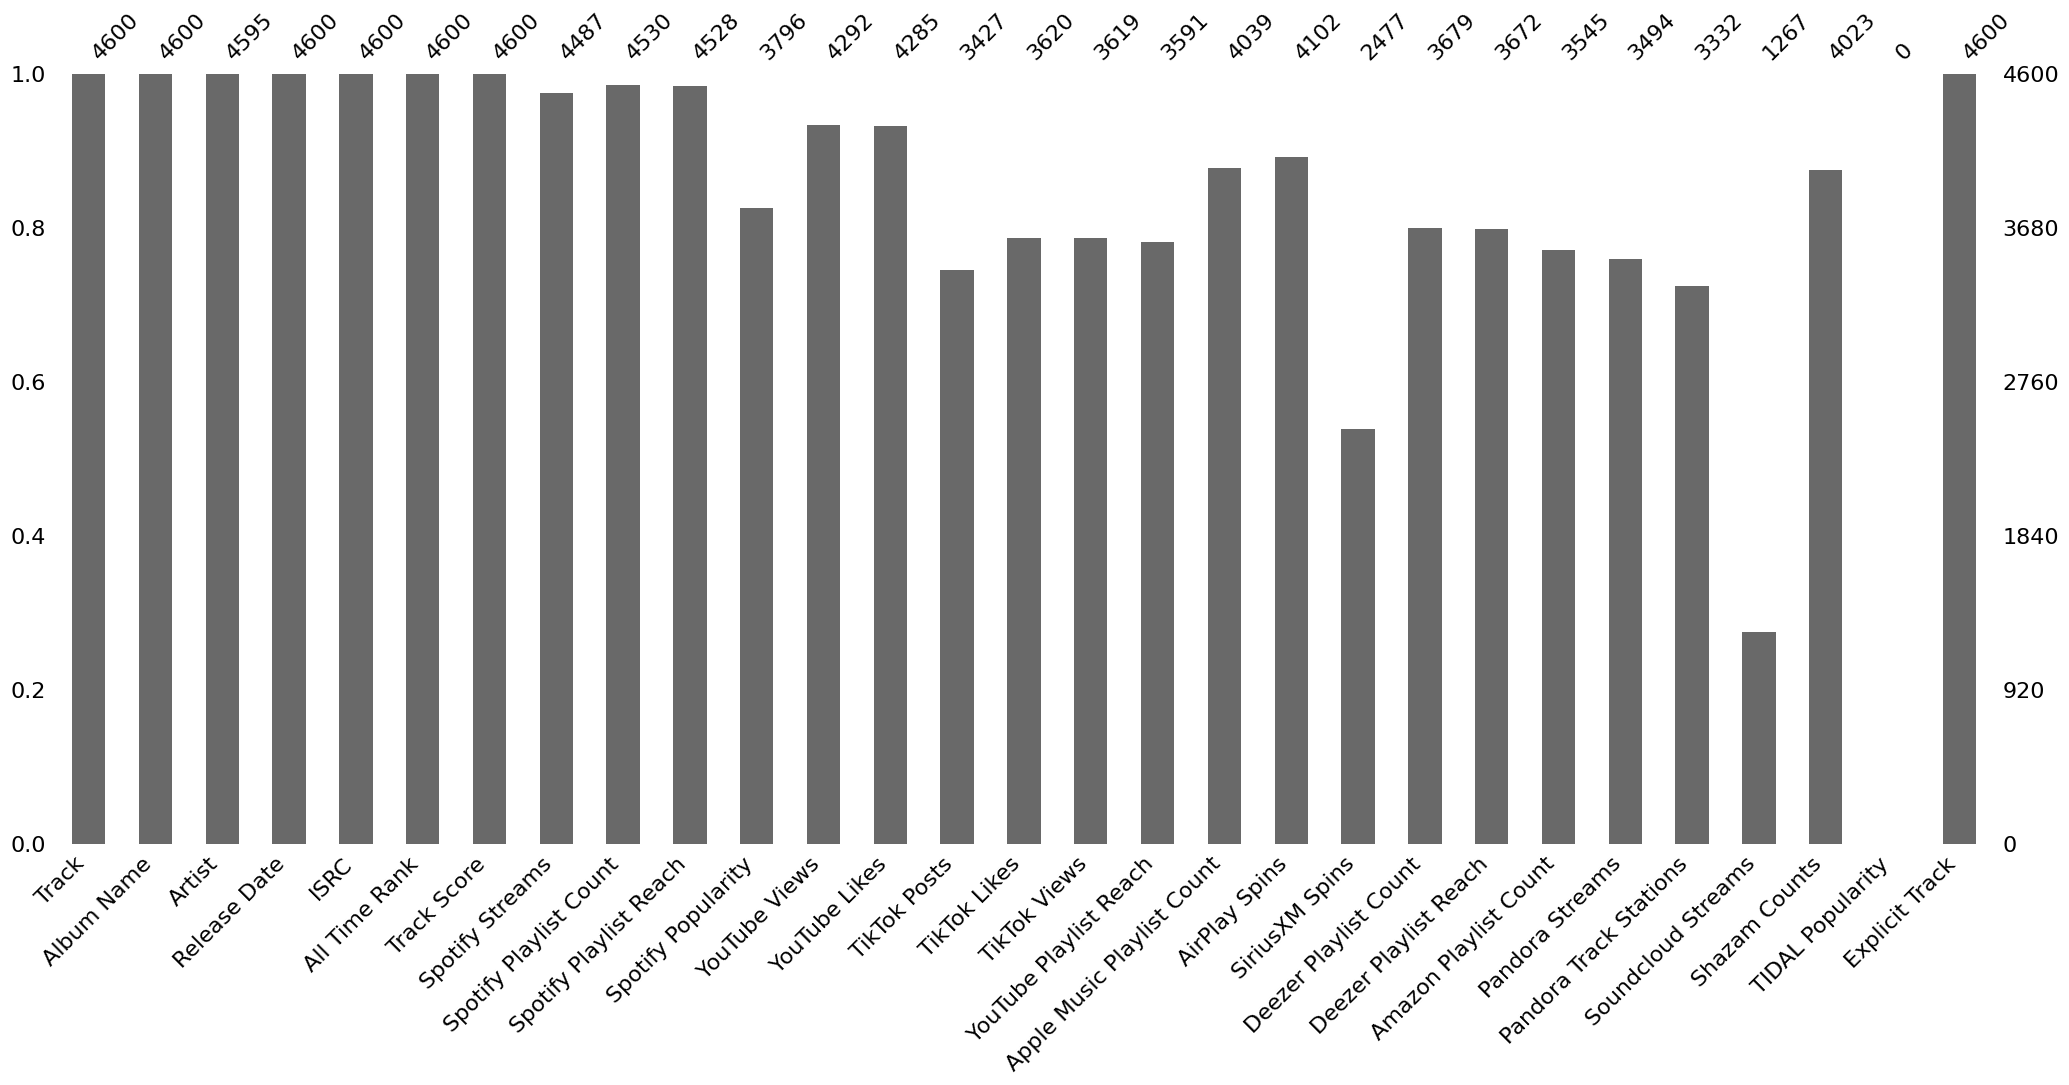

In [53]:
msno.bar(df)
plt.show()

In [54]:
null_values = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).reset_index().rename(columns = {'index' : 'Column', 0 : 'non values'})
null_values.head(29)

,Column,non values
0,TIDAL Popularity,4600
1,Soundcloud Streams,3333
2,SiriusXM Spins,2123
3,Pandora Track Stations,1268
4,TikTok Posts,1173
5,Pandora Streams,1106
6,Amazon Playlist Count,1055
7,YouTube Playlist Reach,1009
8,TikTok Views,981
9,TikTok Likes,980


## 🗑️ Dropping Unnecessary Columns 🧹
The **ISRC** and **TIDAL Popularity** columns were dropped from the dataset:
* ❌ **Reason for ISRC**: This column is not helpful for any real analysis.
* ❌ **Reason for TIDAL Popularity**: This column contained only missing values and did not contribute to our analysis.
* Updated space with _ in column names

In [55]:
df.drop(['ISRC', 'TIDAL Popularity'], axis=1, inplace=True)

df.columns = [col.replace(" ", "_") for col in df.columns]
df.head(10)

,Track,Album_Name,Artist,Release_Date,All_Time_Rank,Track_Score,Spotify_Streams,Spotify_Playlist_Count,Spotify_Playlist_Reach,Spotify_Popularity,...,AirPlay_Spins,SiriusXM_Spins,Deezer_Playlist_Count,Deezer_Playlist_Reach,Amazon_Playlist_Count,Pandora_Streams,Pandora_Track_Stations,Soundcloud_Streams,Shazam_Counts,Explicit_Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,1,725.4,"390,470,936","30,716","196,631,588",92.0,...,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,2,545.9,"323,703,884","28,113","174,597,137",92.0,...,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,3,538.4,"601,309,283","54,331","211,607,669",92.0,...,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,...,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",0
4,Houdini,Houdini,Eminem,5/31/2024,5,423.3,"107,034,922","7,223","151,469,874",88.0,...,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",1
5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,6,410.1,"670,665,438","105,892","175,421,034",83.0,...,"522,042","4,654",86.0,"17,167,254",152.0,"138,529,362","50,982","9,438,601","4,517,131",1
6,Beautiful Things,Beautiful Things,Benson Boone,1/18/2024,7,407.2,"900,158,751","73,118","201,585,714",86.0,...,"383,478",429,168.0,"48,197,850",154.0,"65,447,476","57,372",NaN,"9,990,302",0
7,Gata Only,Gata Only,FloyyMenor,2/2/2024,8,375.8,"675,079,153","40,094","211,236,940",92.0,...,"17,221",30,87.0,"33,245,595",53.0,"3,372,428","5,762",NaN,"6,063,523",1
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,6/9/2024,9,355.7,"1,653,018,119",1,15,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,5/23/2024,10,330.6,"90,676,573","10,400","184,199,419",86.0,...,"3,823",117,78.0,"10,800,098",92.0,"1,005,626",842,"3,679,709","666,302",1


## 😷 Changing data type of columns as per the data analysis
* Release Date column has been changed to datetime
* Removed comma "," in the string cells of dataframe
* Converted all numerical columns to corresponding numerical types

In [56]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df = df.map(lambda x: x.replace(',','') if isinstance(x,str) else x)

for col in df.columns[4:]:
    df[col] = pd.to_numeric(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album_Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release_Date                4600 non-null   datetime64[ns]
 4   All_Time_Rank               4600 non-null   int64         
 5   Track_Score                 4600 non-null   float64       
 6   Spotify_Streams             4487 non-null   float64       
 7   Spotify_Playlist_Count      4530 non-null   float64       
 8   Spotify_Playlist_Reach      4528 non-null   float64       
 9   Spotify_Popularity          3796 non-null   float64       
 10  YouTube_Views               4292 non-null   float64       
 11  YouTube_Likes               4285 non-null   float64     

## 🔄 Cleaning data and filling NA values 🔥
We checked for NaN entries in the dataset:
* 🚨 replaced NaN with 0 for "Soundcloud Streams" as almost 75%+ had null values
* 🚨 replaced NaN with mean valus for all other columns
* 🚨 replaced Explicit Track with True for "1" and False for "0"

In [57]:
df = df.fillna(value={'Artist': 'Unknown'})
df['Soundcloud_Streams'].fillna(0)
for col in df.columns[5:]:
    # df[col] = imputer.fit_transform(df[[col]])
    df[col].fillna(df[col].mean(),inplace=True)
df['Explicit_Track'] = df['Explicit_Track'].replace(1, True).replace(0, False).astype('category')

## 🔄 Removing Duplicates 🔥
We checked for duplicate entries in the dataset:
* 🚨 **Duplicates Found**: 2
* 🗑️ **Duplicates Removed**: The dataset now contains 4598 rows.

In [58]:
df[df.duplicated(keep=False)]

,Track,Album_Name,Artist,Release_Date,All_Time_Rank,Track_Score,Spotify_Streams,Spotify_Playlist_Count,Spotify_Playlist_Reach,Spotify_Popularity,...,AirPlay_Spins,SiriusXM_Spins,Deezer_Playlist_Count,Deezer_Playlist_Reach,Amazon_Playlist_Count,Pandora_Streams,Pandora_Track_Stations,Soundcloud_Streams,Shazam_Counts,Explicit_Track
2449,Tennessee Orange,Tennessee Orange,Megan Moroney,2022-09-02,2424,28.9,227893586.0,28139.0,12480714.0,73.0,...,129172.0,34.0,5.0,1370.0,49.0,56972562.0,26968.0,1.336043e+06,708143.0,False
2450,Tennessee Orange,Tennessee Orange,Megan Moroney,2022-09-02,2424,28.9,227893586.0,28139.0,12480714.0,73.0,...,129172.0,34.0,5.0,1370.0,49.0,56972562.0,26968.0,1.336043e+06,708143.0,False
3447,Dembow,Dembow,Danny Ocean,2017-12-08,3441,23.3,579189526.0,60397.0,11805084.0,65.0,...,5406.0,9.0,20.0,37649.0,12.0,6723858.0,7832.0,1.484797e+07,1619550.0,False
3450,Dembow,Dembow,Danny Ocean,2017-12-08,3441,23.3,579189526.0,60397.0,11805084.0,65.0,...,5406.0,9.0,20.0,37649.0,12.0,6723858.0,7832.0,1.484797e+07,1619550.0,False


In [59]:
df.drop_duplicates(keep="first", inplace = True)
df.duplicated().sum()

0

In [60]:
sort_streaming = df.sort_values(by='Spotify_Streams', ascending=False)
sort_streaming.head(15)

,Track,Album_Name,Artist,Release_Date,All_Time_Rank,Track_Score,Spotify_Streams,Spotify_Playlist_Count,Spotify_Playlist_Reach,Spotify_Popularity,...,AirPlay_Spins,SiriusXM_Spins,Deezer_Playlist_Count,Deezer_Playlist_Reach,Amazon_Playlist_Count,Pandora_Streams,Pandora_Track_Stations,Soundcloud_Streams,Shazam_Counts,Explicit_Track
55,Blinding Lights,Blinding Lights,The Weeknd,2019-11-29,56,194.0,4.281469e+09,590392.000000,1.655440e+08,83.000000,...,1.695240e+06,1116.000000,564.000000,1.170113e+07,184.000000,4.892998e+08,319634.000000,2.865947e+07,2.899466e+07,False
4254,Blinding Lights,Blinding Lights,xSyborg,2021-03-13,4229,20.5,4.261328e+09,59390.829801,2.334682e+07,63.501581,...,5.513916e+04,257.344368,32.310954,1.294939e+06,25.348942,8.566735e+07,87876.965786,1.484797e+07,2.529149e+06,False
53,Shape of You,Shape of You,Ed Sheeran,2017-01-06,54,195.1,3.909459e+09,316378.000000,1.480379e+08,80.000000,...,4.028290e+05,282.000000,512.000000,2.710931e+06,115.000000,7.335657e+08,651557.000000,7.814938e+07,1.146246e+06,False
1637,Shape of You,Shape of You,xSyborg,2021-02-20,1807,36.3,3.888356e+09,59390.829801,2.334682e+07,63.501581,...,5.513916e+04,257.344368,32.310954,1.294939e+06,25.348942,8.566735e+07,87876.965786,1.484797e+07,2.529149e+06,False
132,Someone You Loved,Breach,Lewis Capaldi,2018-11-08,133,129.7,3.427499e+09,338763.000000,1.605539e+08,82.000000,...,6.002110e+05,381.000000,502.000000,4.834088e+06,110.000000,4.272123e+08,357540.000000,1.484797e+07,2.926630e+07,False
114,Sunflower - Spider-Man: Into the Spider-Verse,Sunflower (Spider-Man: Into the Spider-Verse),Post Malone,2018-10-18,116,143.9,3.358704e+09,392082.000000,1.239172e+08,79.000000,...,2.736830e+05,257.344368,86.000000,8.093520e+05,99.000000,5.463674e+08,906813.000000,1.484797e+07,1.569935e+06,False
19,As It Was,As It Was,Harry Styles,2022-03-31,20,292.0,3.301815e+09,407119.000000,1.697834e+08,87.000000,...,1.777811e+06,4909.000000,330.000000,1.290785e+07,189.000000,1.326248e+08,79909.000000,1.484797e+07,1.496738e+07,False
3406,As It Was,As It Was (Official Video),Harry Styles,2022-03-31,3410,23.5,3.299082e+09,1.000000,1.000000e+00,63.501581,...,5.513916e+04,257.344368,32.310954,1.294939e+06,25.348942,8.566735e+07,87876.965786,1.484797e+07,2.529149e+06,False
262,Starboy,Starboy,The Weeknd,2016-09-22,265,95.7,3.291262e+09,366133.000000,9.802265e+07,84.000000,...,6.844100e+04,148.000000,118.000000,8.756830e+05,67.000000,3.312952e+08,418888.000000,2.361207e+07,1.564817e+07,True
519,One Dance,One Dance (feat. Wizkid & Kyla) - Single,Drake,2016-04-04,518,67.9,3.192204e+09,379853.000000,1.318327e+08,82.000000,...,1.843110e+05,932.000000,165.000000,1.383884e+06,97.000000,7.145081e+08,601041.000000,1.484797e+07,2.131659e+07,False


## 🔄 Removing Logical Duplicates 🔥
Here we notice that same tracks have been used in multiple albums.
But upon further investigation and looking at the dataset it seems that some Tracks were uploaded multiples times but are not necessarily duplicates.  
So we are going to deletes the Tracks that have the same amount of Spotify_Streams over multiple Albums because their data somehow doubled

In [61]:
df[df.duplicated(subset=['Track', 'Spotify_Streams'], keep='first')]

,Track,Album_Name,Artist,Release_Date,All_Time_Rank,Track_Score,Spotify_Streams,Spotify_Playlist_Count,Spotify_Playlist_Reach,Spotify_Popularity,...,AirPlay_Spins,SiriusXM_Spins,Deezer_Playlist_Count,Deezer_Playlist_Reach,Amazon_Playlist_Count,Pandora_Streams,Pandora_Track_Stations,Soundcloud_Streams,Shazam_Counts,Explicit_Track
47,Danza Kuduro - Cover,GEKIATU BEST AGE SONG - CLUB SONG,MUSIC LAB JPN,2024-05-02,48,204.4,1.655575e+09,9.000000,8.500000e+01,63.501581,...,55139.156753,257.344368,32.310954,1.294939e+06,25.348942,8.566735e+07,8.787697e+04,1.484797e+07,2.529149e+06,True
58,Danza Kuduro - Cover,YOUGAKU MORIMORI CLUB MEDLEY,MUSIC LAB JPN,2024-04-29,59,190.0,1.655575e+09,1.000000,3.000000e+00,63.501581,...,55139.156753,257.344368,32.310954,1.294939e+06,25.348942,8.566735e+07,8.787697e+04,1.484797e+07,2.529149e+06,True
157,Too Sweet,Unreal Unearth: Unheard,Hozier,2024-03-22,158,121.2,5.320128e+08,22396.000000,1.307525e+08,85.000000,...,6952.000000,257.344368,85.000000,2.530700e+07,108.000000,8.566735e+07,8.787697e+04,1.198130e+05,2.580089e+06,False
377,I Had Some Help (feat. Morgan Wallen),I Had Some Help,Post Malone,2024-05-10,377,79.4,2.500804e+08,2711.000000,4.839848e+06,63.501581,...,19724.000000,257.344368,6.000000,4.473900e+04,19.000000,8.566735e+07,8.787697e+04,1.484797e+07,2.529149e+06,False
395,A Bar Song (Tipsy),A Bar Song (Tipsy),Shaboozey,2024-04-12,395,76.8,3.119285e+08,1668.000000,4.447700e+06,23.000000,...,60470.000000,257.344368,32.310954,1.294939e+06,6.000000,8.566735e+07,8.787697e+04,1.484797e+07,2.529149e+06,False
685,Last Night,3 Songs At A Time Sampler,Morgan Wallen,2023-01-31,681,58.6,9.220101e+08,5520.000000,5.760140e+05,50.000000,...,546787.000000,257.344368,32.310954,1.294939e+06,4.000000,8.566735e+07,8.787697e+04,1.484797e+07,2.529149e+06,False
935,Espresso,Espresso,Sabrina Carpenter,2024-04-12,933,49.9,5.369865e+08,1.000000,2.000000e+00,63.501581,...,55139.156753,257.344368,32.310954,1.294939e+06,25.348942,8.566735e+07,8.787697e+04,1.484797e+07,2.529149e+06,True
1014,good 4 u,good 4 u,Olivia Rodrigo,2021-05-14,1009,47.8,2.167768e+09,12805.000000,3.065794e+06,54.000000,...,819886.000000,257.344368,6.000000,1.929220e+05,2.000000,8.566735e+07,8.787697e+04,1.484797e+07,7.171230e+06,False
1199,Papercut,Papercuts,Linkin Park,2024-04-12,1193,43.4,4.972858e+08,4.000000,4.660000e+02,63.501581,...,55139.156753,257.344368,32.310954,1.294939e+06,25.348942,8.566735e+07,8.787697e+04,4.760000e+02,2.529149e+06,False
1322,yes and?,yes and?,Ariana Grande,2024-01-12,1320,41.0,4.168140e+08,2906.000000,4.683812e+06,63.501581,...,81358.000000,257.344368,8.000000,4.878007e+06,25.348942,8.566735e+07,8.787697e+04,1.484797e+07,2.529149e+06,False


In [62]:
df.drop_duplicates(subset=['Track', 'Spotify_Streams'], keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4546 entries, 0 to 4599
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4546 non-null   object        
 1   Album_Name                  4546 non-null   object        
 2   Artist                      4546 non-null   object        
 3   Release_Date                4546 non-null   datetime64[ns]
 4   All_Time_Rank               4546 non-null   int64         
 5   Track_Score                 4546 non-null   float64       
 6   Spotify_Streams             4546 non-null   float64       
 7   Spotify_Playlist_Count      4546 non-null   float64       
 8   Spotify_Playlist_Reach      4546 non-null   float64       
 9   Spotify_Popularity          4546 non-null   float64       
 10  YouTube_Views               4546 non-null   float64       
 11  YouTube_Likes               4546 non-null   float64       
 1

## 📉 Shorteting track names with more than 30 characters

In [63]:
df['Track'] = df['Track'].apply(lambda x: x[:20] + '...' if len(x) > 30 else x)

## ➕ Adding Columns for further analysis

In [64]:
month = df["Release_Date"].dt.month_name().astype(str)
year = df["Release_Date"].dt.year.astype("category")
df.insert(4,"Month", month)
df.insert(5,"Year", year)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4546 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4546 non-null   object        
 1   Album_Name                  4546 non-null   object        
 2   Artist                      4546 non-null   object        
 3   Release_Date                4546 non-null   datetime64[ns]
 4   Month                       4546 non-null   object        
 5   Year                        4546 non-null   category      
 6   All_Time_Rank               4546 non-null   int64         
 7   Track_Score                 4546 non-null   float64       
 8   Spotify_Streams             4546 non-null   float64       
 9   Spotify_Playlist_Count      4546 non-null   float64       
 10  Spotify_Playlist_Reach      4546 non-null   float64       
 11  Spotify_Popularity          4546 non-null   float64       
 1

## 📊 Descriptive Statistics 📈
We computed descriptive statistics for the numerical and categorical columns

In [65]:
# filtering float columns
numeric_df = df.select_dtypes(include = ['float64'])
# handpicking few int columns
numeric_df['All_Time_Rank'] = df['All_Time_Rank']
numeric_df.describe()

,Track_Score,Spotify_Streams,Spotify_Playlist_Count,Spotify_Playlist_Reach,Spotify_Popularity,YouTube_Views,YouTube_Likes,TikTok_Posts,TikTok_Likes,TikTok_Views,...,AirPlay_Spins,SiriusXM_Spins,Deezer_Playlist_Count,Deezer_Playlist_Reach,Amazon_Playlist_Count,Pandora_Streams,Pandora_Track_Stations,Soundcloud_Streams,Shazam_Counts,All_Time_Rank
count,4546.000000,4.546000e+03,4546.000000,4.546000e+03,4546.000000,4.546000e+03,4.546000e+03,4.546000e+03,4.546000e+03,4.546000e+03,...,4.546000e+03,4546.000000,4546.000000,4.546000e+03,4546.000000,4.546000e+03,4.546000e+03,4.546000e+03,4.546000e+03,4546.000000
mean,41.868016,4.381079e+08,59611.945980,2.345267e+07,63.542505,4.017365e+08,2.921713e+06,9.461295e+05,1.128239e+08,1.163203e+09,...,5.457748e+04,257.540606,32.336118,1.289444e+06,25.360760,8.517479e+07,8.746453e+04,1.480927e+07,2.520115e+06,2289.798504
std,38.580143,5.209334e+08,70344.697709,2.946686e+07,14.706335,6.800965e+08,4.444546e+06,2.119890e+06,4.905973e+08,5.247409e+09,...,1.197383e+05,409.356097,48.745045,3.167241e+06,22.870099,1.457390e+08,2.222541e+05,1.673167e+07,5.655324e+06,1324.418757
min,19.400000,1.071000e+03,1.000000,1.000000e+00,1.000000,9.130000e+02,2.500000e+01,1.000000e+00,3.000000e+00,1.900000e+01,...,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,2.000000e+00,1.000000e+00,1.800000e+01,1.000000e+00,1.000000
25%,23.325000,7.192279e+07,7159.750000,5.058149e+06,62.000000,4.552807e+07,4.465310e+05,6.633975e+04,9.271262e+06,9.191734e+07,...,6.930000e+02,74.000000,7.000000,8.337025e+04,10.000000,2.514806e+06,2.653000e+03,1.484797e+07,2.861412e+05,1139.250000
50%,29.900000,2.473931e+08,33821.500000,1.369891e+07,65.000000,1.707751e+08,1.437054e+06,4.623515e+05,5.336698e+07,5.007433e+08,...,9.667000e+03,257.344368,24.000000,4.359730e+05,25.348942,3.980747e+07,2.921400e+04,1.484797e+07,1.160080e+06,2290.500000
75%,44.600000,5.999419e+08,85294.000000,2.940021e+07,71.000000,4.223340e+08,3.360093e+06,9.443076e+05,1.126375e+08,1.161158e+09,...,5.513916e+04,257.344368,32.310954,1.294939e+06,28.000000,8.566735e+07,8.787697e+04,1.484797e+07,2.529149e+06,3434.750000
max,725.400000,4.281469e+09,590392.000000,2.623434e+08,96.000000,1.632276e+10,6.231118e+07,4.290000e+07,2.347422e+10,2.332323e+11,...,1.777811e+06,7098.000000,632.000000,4.819785e+07,210.000000,1.463624e+09,3.780513e+06,3.198359e+08,2.197945e+08,4998.000000


In [66]:
# filtering float columns
categorical_df = df.select_dtypes(include = ['object','category','datetime'])
categorical_df['Release_Date']=categorical_df['Release_Date'].dt.strftime("%Y-%m-%d")
# handpicking few int columns
categorical_df.describe(include='all')

,Track,Album_Name,Artist,Release_Date,Month,Year,Explicit_Track
count,4546,4546,4546,4546,4546,4546,4546
unique,4353,3981,1997,1551,12,30,2
top,ýýýýýýýýýýýýýýýýýýýý...,Un Verano Sin Ti,Drake,2012-01-01,May,2023,False
freq,11,20,61,37,507,1143,2911


In [67]:
df['Year'] = df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4546 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4546 non-null   object        
 1   Album_Name                  4546 non-null   object        
 2   Artist                      4546 non-null   object        
 3   Release_Date                4546 non-null   datetime64[ns]
 4   Month                       4546 non-null   object        
 5   Year                        4546 non-null   int64         
 6   All_Time_Rank               4546 non-null   int64         
 7   Track_Score                 4546 non-null   float64       
 8   Spotify_Streams             4546 non-null   float64       
 9   Spotify_Playlist_Count      4546 non-null   float64       
 10  Spotify_Playlist_Reach      4546 non-null   float64       
 11  Spotify_Popularity          4546 non-null   float64       
 1

# Data Analysis

## Correlation Analysis using heatmap

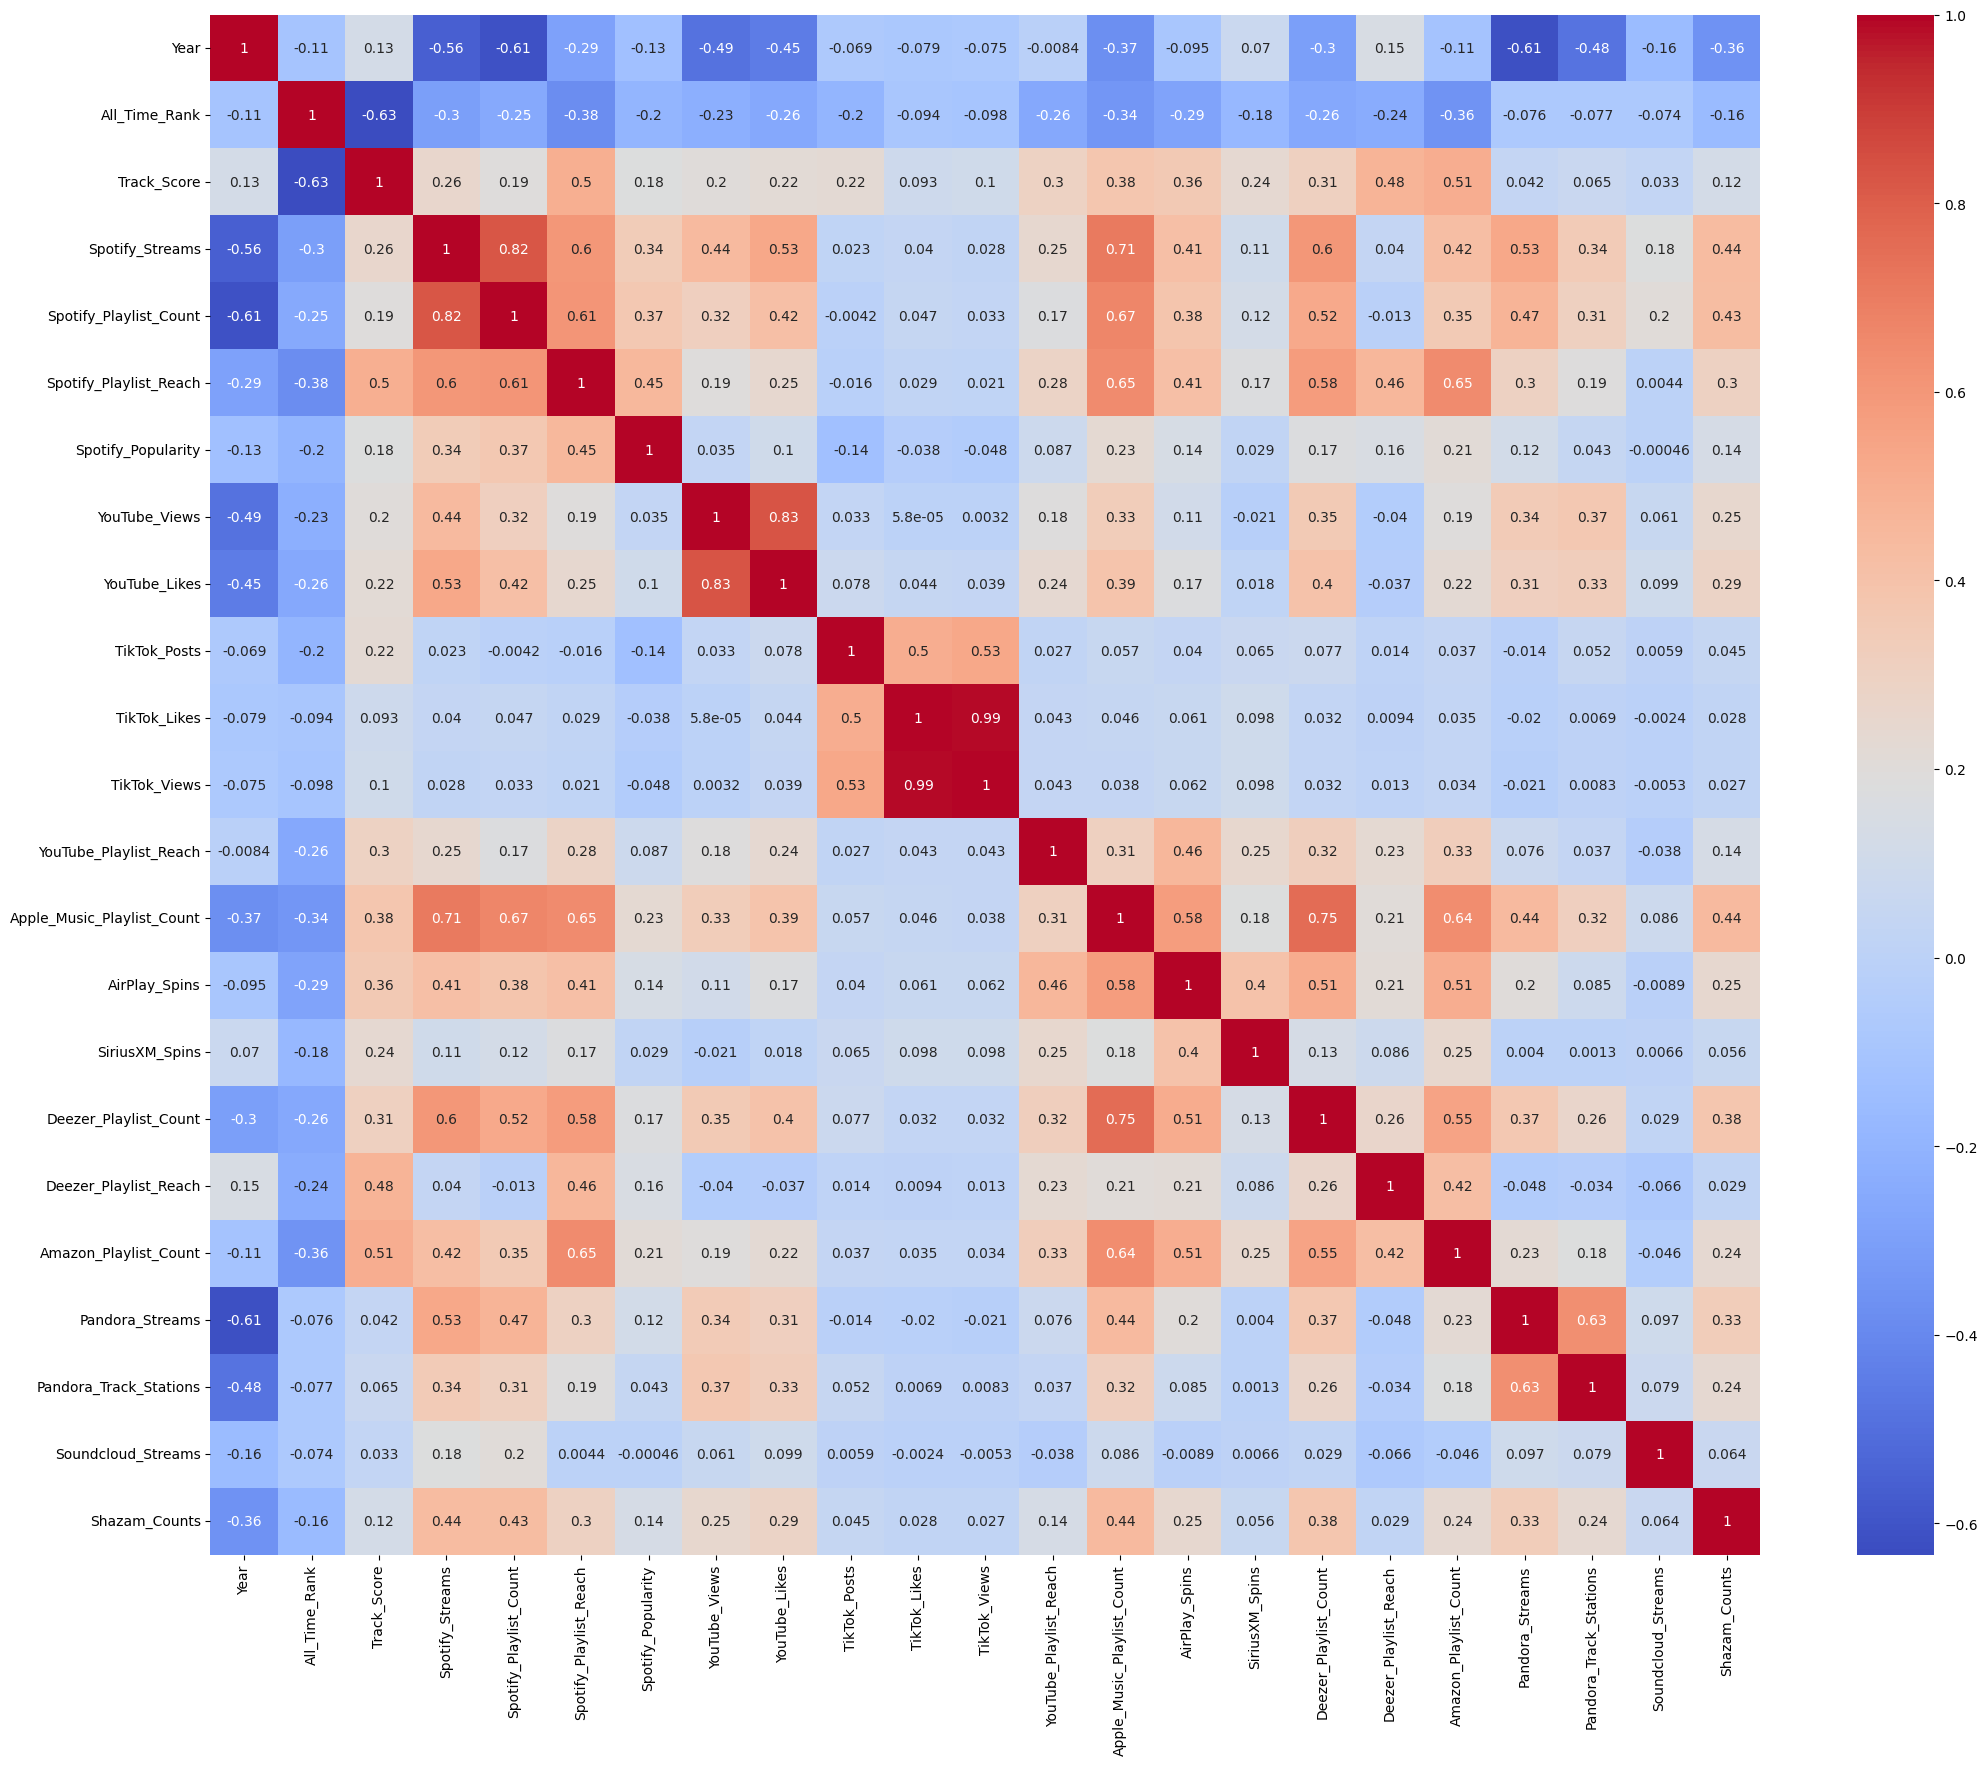

In [68]:
plt.figure(figsize = (25, 20))
numeric_df = df.select_dtypes(include = ['float64', 'int64', 'int32'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm");

## Monthly releases analysis

In [69]:
date = df.groupby(['Month', 'Year'])['Track'].size().reset_index()
date = date[date['Year'] > 2005]

avg_month = date.groupby('Month')['Track'].mean().round()
total_month = date.groupby('Month')['Track'].sum()
year = date.groupby('Year')['Track'].sum().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
total_month = total_month.reindex(month_order).reset_index()
avg_month = avg_month.reindex(month_order).reset_index()

# Making figures
fig1 = px.bar(total_month, x='Month', y='Track', text='Track')
fig1_title ='<b>Total number of songs released per month</b><br><br><sup>(2006 - 2024)</sup>'

fig2 = px.bar(avg_month, x='Month', y='Track', text='Track')
fig2_title='<b>Average songs per month</b><br><br><sup>(2006 - 2024)</sup>'

# Breaking figures into traces
fig1_traces = []
fig2_traces = []
for trace in range(len(fig1["data"])):
    fig1_traces.append(fig1["data"][trace])
for trace in range(len(fig2["data"])):
    fig2_traces.append(fig2["data"][trace])

#Create a 1x2 subplot
final_fig = make_subplots(rows=1, cols=2, subplot_titles=(fig1_title, fig2_title))

# Get the Express fig broken down as traces and add the traces to
# the proper plot within in the subplot
for traces in fig1_traces:
    final_fig.append_trace(traces, row=1, col=1)
for traces in fig2_traces:
    final_fig.append_trace(traces, row=1, col=2)

final_fig.update_layout(title_text='<b>From Top 5000 on Spotify</b>', title_x=0.5, title_y=0.93,
                        height=600, width=1100, margin=dict(l=20, r=20, t=150, b=20))
final_fig.show()


In [70]:
fig = px.bar(year, x='Year', y='Track', text='Track',
            title='<b>Number of songs released each year</b><br><sub>(2006 - 2024)</sub>',
            height=700, width=1100)
fig.update_layout(title_x = 0.5)
fig.show()

In [71]:
monthly_releases = df.groupby(['Year','Month']).size().reset_index(name = "Count")
monthly_releases

,Year,Month,Count
0,1987,July,1
1,1991,September,1
2,1994,January,1
3,1998,April,1
4,1999,June,1
...,...,...,...
184,2024,February,102
185,2024,January,70
186,2024,June,47
187,2024,March,132


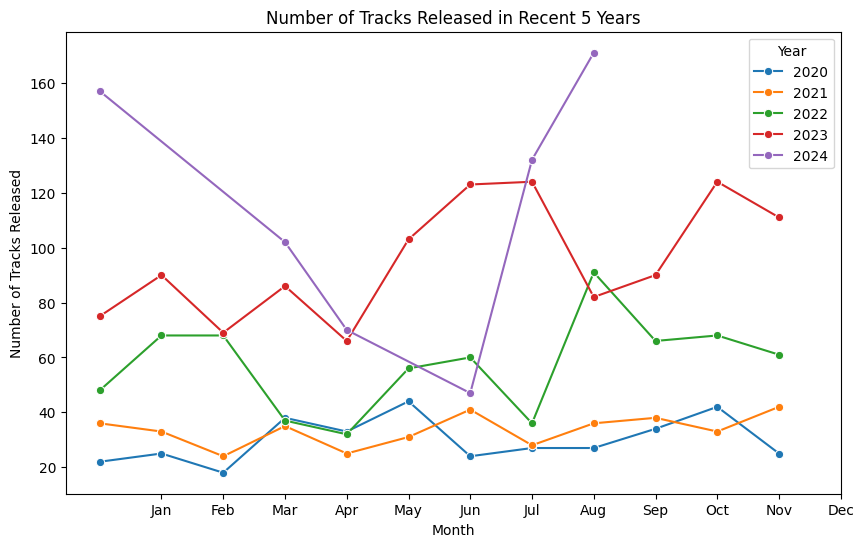

In [72]:
plt.figure(figsize = (10,6))

monthly_releases = df.groupby(['Year','Month']).size().reset_index(name = "Count")
recent_years = monthly_releases.Year.unique()[-5:]
recent_data = monthly_releases[monthly_releases['Year'].isin(recent_years)]

ax = sns.lineplot(data=recent_data, x='Month', y='Count', hue='Year', palette='tab10', marker = 'o')
plt.title('Number of Tracks Released in Recent 5 Years')
plt.xlabel('Month')
plt.ylabel('Number of Tracks Released')

month_names = [calendar.month_abbr[i] for i in range(1,13)]
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_names);

## Stream Analysis

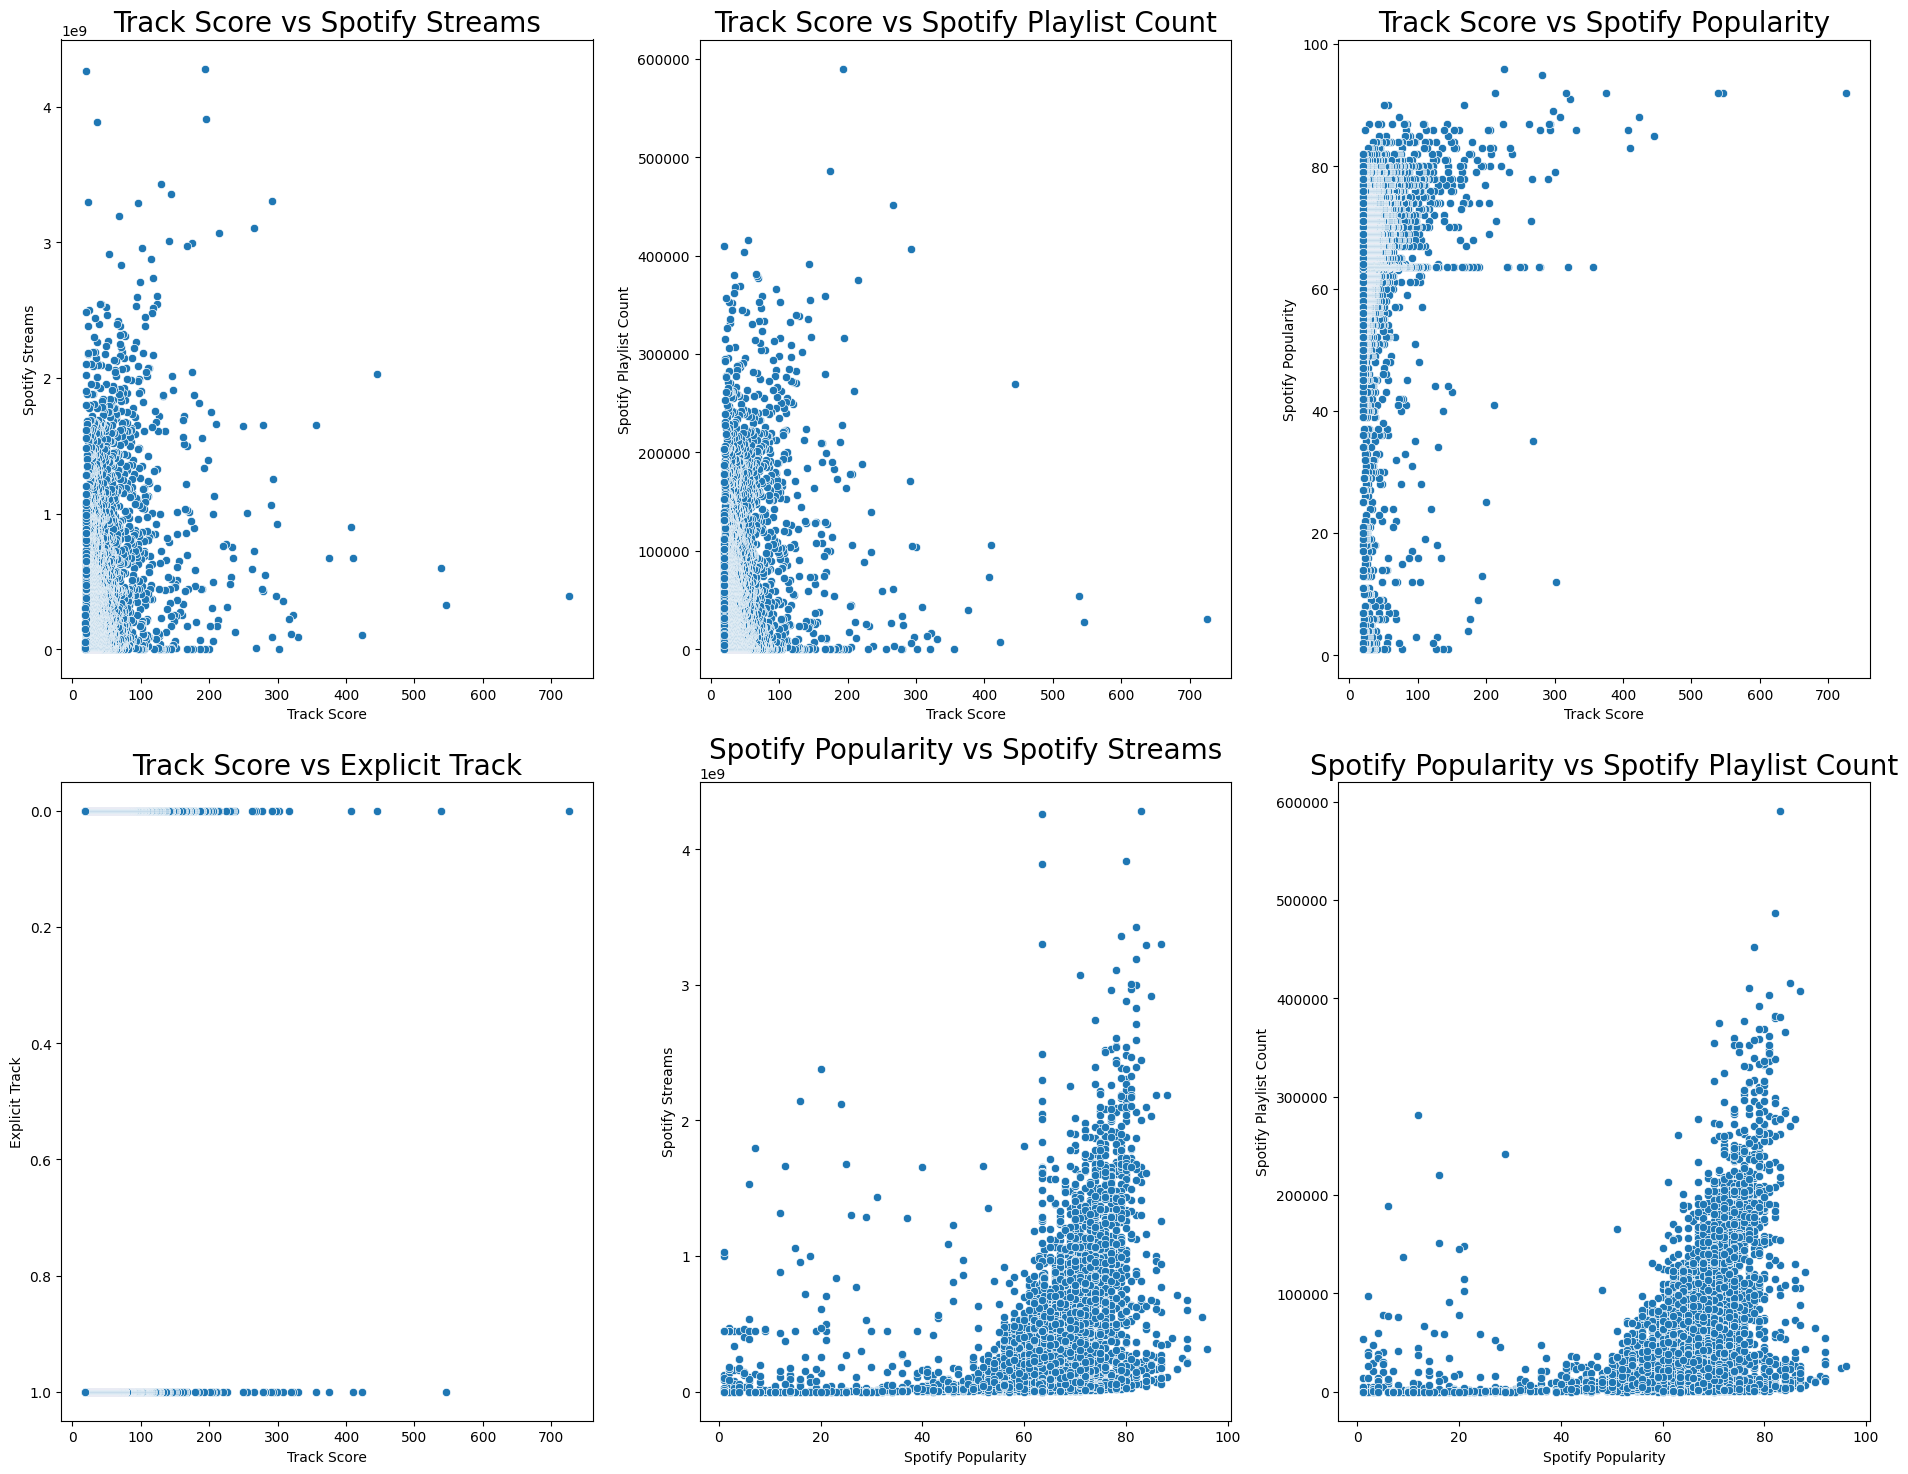

In [73]:
fig, ax = plt.subplots(figsize=(19,15),nrows=2,ncols=3)


sns.scatterplot(x='Track_Score', y='Spotify_Streams', data=df,ax=ax[0,0])
ax[0,0].set_xlabel('Track Score')
ax[0,0].set_ylabel('Spotify Streams')
ax[0,0].set_title('Track Score vs Spotify Streams',fontsize=20)


sns.scatterplot(x='Track_Score', y='Spotify_Playlist_Count', data=df,ax=ax[0,1])
ax[0,1].set_xlabel('Track Score')
ax[0,1].set_ylabel('Spotify Playlist Count')
ax[0,1].set_title('Track Score vs Spotify Playlist Count',fontsize=20)


sns.scatterplot(x='Track_Score', y='Spotify_Popularity', data=df,ax=ax[0,2])
ax[0,2].set_xlabel('Track Score')
ax[0,2].set_ylabel('Spotify Popularity')
ax[0,2].set_title('Track Score vs Spotify Popularity',fontsize=20)


sns.scatterplot(x='Track_Score', y='Explicit_Track', data=df,ax=ax[1,0])
ax[1,0].set_xlabel('Track Score')
ax[1,0].set_ylabel('Explicit Track')
ax[1,0].set_title('Track Score vs Explicit Track',fontsize=20)


sns.scatterplot(x='Spotify_Popularity', y='Spotify_Streams', data=df,ax=ax[1,1])
ax[1,1].set_xlabel('Spotify Popularity')
ax[1,1].set_ylabel('Spotify Streams')
ax[1,1].set_title('Spotify Popularity vs Spotify Streams',fontsize=20)


sns.scatterplot(x='Spotify_Popularity', y='Spotify_Playlist_Count', data=df,ax=ax[1,2])
ax[1,2].set_xlabel('Spotify Popularity')
ax[1,2].set_ylabel('Spotify Playlist Count')
ax[1,2].set_title('Spotify Popularity vs Spotify Playlist Count',fontsize=20)


plt.tight_layout()
plt.show()


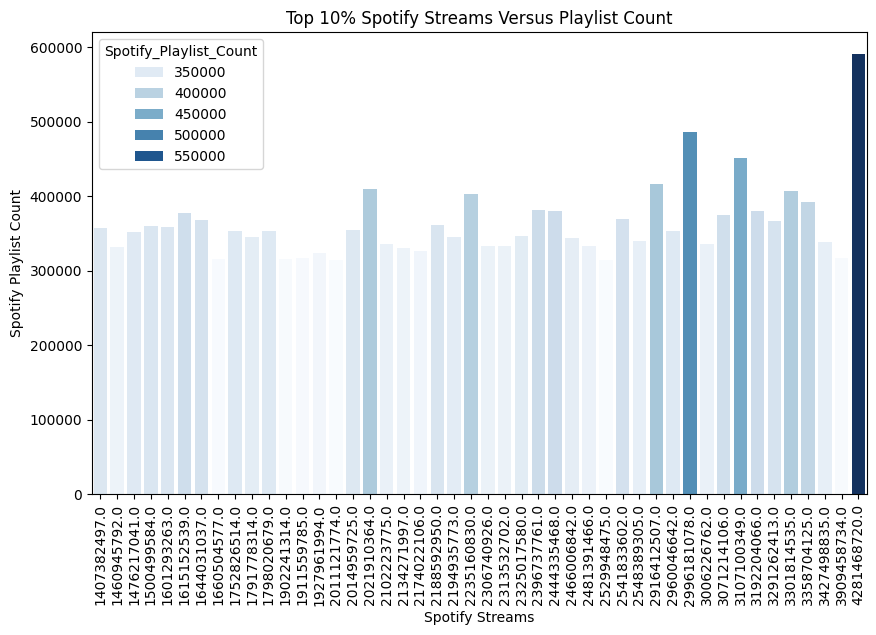

In [74]:
## How does being on a playlist affect a song's plays? ##

# Calculate the threshold for the top 10% of 'Spotify Streams'
streams_threshold = df['Spotify_Streams'].quantile(0.90)

# Filter the dataset to include only rows where 'Spotify Streams' is above the threshold
top_streams_data = df[df['Spotify_Streams'] >= streams_threshold]

# Calculate the threshold for the top 10% of 'Spotify Playlist Count' within the filtered dataset
playlist_threshold = top_streams_data['Spotify_Playlist_Count'].quantile(0.90)

# Further filter the data to include only rows where 'Spotify Playlist Count' is above this new threshold
top_data = top_streams_data[top_streams_data['Spotify_Playlist_Count'] >= playlist_threshold]

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Spotify_Streams', y='Spotify_Playlist_Count', data=top_data, hue='Spotify_Playlist_Count', palette='Blues', dodge=False)

# Adding labels and title
plt.xlabel('Spotify Streams')
plt.ylabel('Spotify Playlist Count')
plt.title('Top 10% Spotify Streams Versus Playlist Count')
plt.xticks(rotation = 90)

# Show the plot
plt.show()

From this graph, we can see that Playlist Count and Streams aren't necissarily related. Many songs are in more playlist, but that doesn't mean they have more streams.

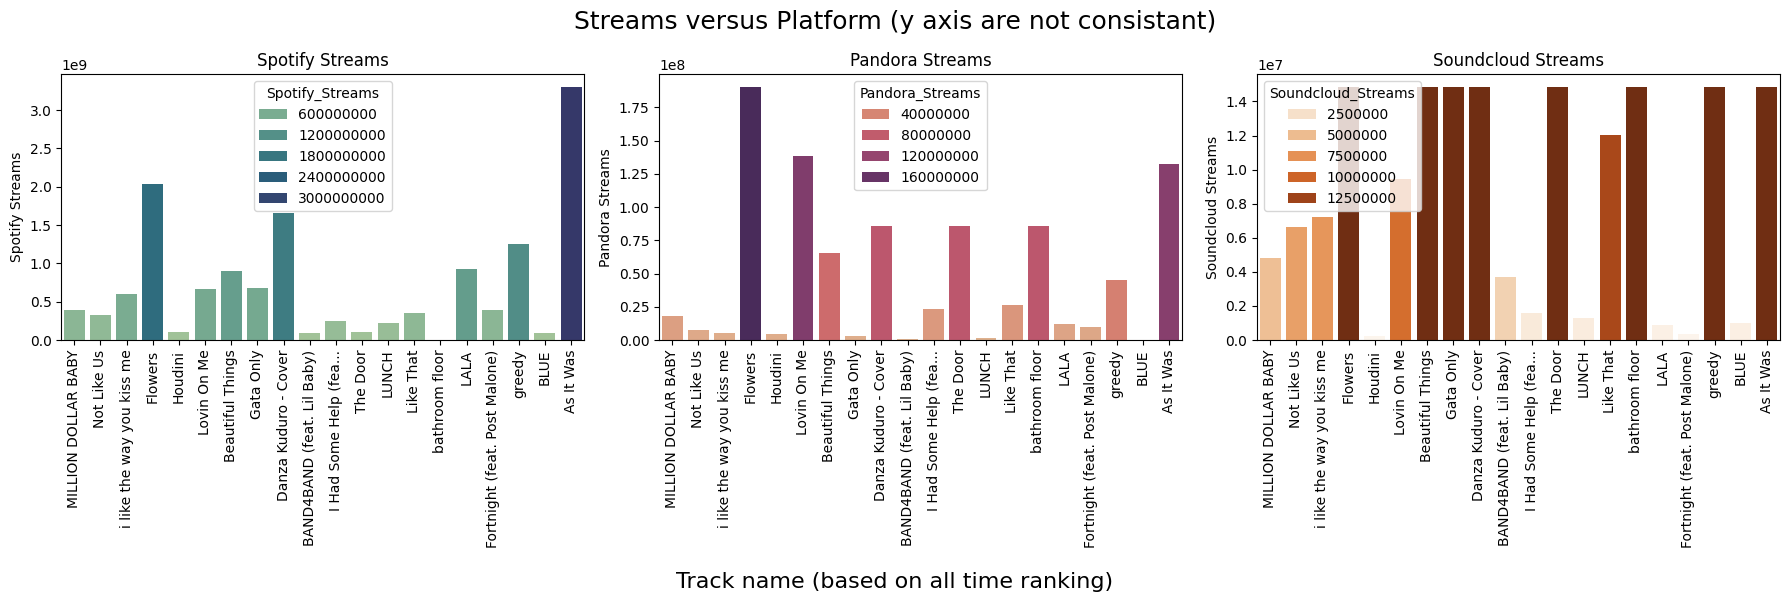

In [75]:
## Do songs tend to do the same across different platforms? ##

# Sort by 'All Time Rank' and get the top 20 entries
top_20_data = df.nsmallest(20, 'All_Time_Rank')

# Ensure 'Track' is sorted in the correct order for the bar plot
top_20_data = top_20_data.sort_values(by='All_Time_Rank')

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)
fig.suptitle('Streams versus Platform (y axis are not consistant)', fontsize=18)
fig.supxlabel('Track name (based on all time ranking)', fontsize=16)

# Plot 'Spotify Streams'
sns.barplot(x='Track', y='Spotify_Streams', data=top_20_data, ax=axes[0], hue='Spotify_Streams', palette='crest', dodge=False)
axes[0].set_title('Spotify Streams')
axes[0].set_xlabel('')
axes[0].set_ylabel('Spotify Streams')


# Plot 'Pandora Streams'
sns.barplot(x='Track', y='Pandora_Streams', data=top_20_data, ax=axes[1], hue='Pandora_Streams', palette='flare', dodge=False)
axes[1].set_title('Pandora Streams')
axes[1].set_xlabel('')
axes[1].set_ylabel('Pandora Streams')


# Plot 'Soundcloud Streams'
sns.barplot(x='Track', y='Soundcloud_Streams', data=top_20_data, ax=axes[2], hue='Soundcloud_Streams', palette='Oranges', dodge=False)
axes[2].set_title('Soundcloud Streams')
axes[2].set_xlabel('')
axes[2].set_ylabel('Soundcloud Streams')


# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


From these graphs, we can see a couple different things. First off, Spotify overall has the most streams by far of the three platforms. Second, we can see a large outlier on every graph, the track 'STAY with Justin Bieber'. Since we sorted this by All Time Ranking, that may be a relationship we need to look further at. Does All Time Ranking accurately reflect how popular a song is? Otherways, we can see that streams are not consistant between platforms. 'Lovin On Me' for example, has around 120000000 streams on Pandora, proportionally much more than either of the other platforms. Therefore, we know that songs do not perform the same across platforms.

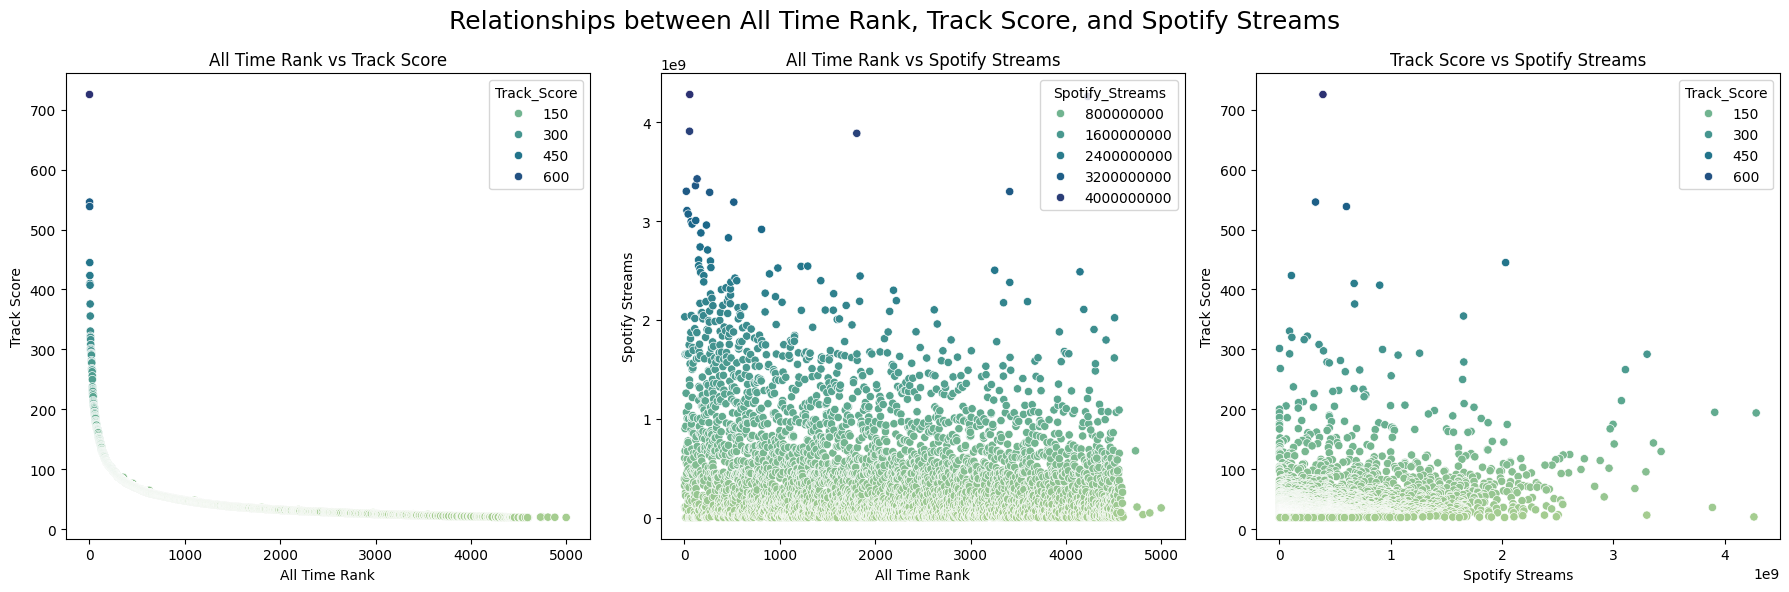

In [76]:
## Are all time rank, track score, and streams related? ##

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Relationships between All Time Rank, Track Score, and Spotify Streams', fontsize=18)

# Plot 'All Time Rank' vs 'Track Score'
sns.scatterplot(x='All_Time_Rank', y='Track_Score', data=df, ax=axes[0], hue='Track_Score', palette='crest')
axes[0].set_title('All Time Rank vs Track Score')
axes[0].set_xlabel('All Time Rank')
axes[0].set_ylabel('Track Score')

# Plot 'All Time Rank' vs 'Spotify Streams'
sns.scatterplot(x='All_Time_Rank', y='Spotify_Streams', data=df, ax=axes[1], hue='Spotify_Streams', palette='crest')
axes[1].set_title('All Time Rank vs Spotify Streams')
axes[1].set_xlabel('All Time Rank')
axes[1].set_ylabel('Spotify Streams')

# Plot 'Track Score' vs 'Spotify Streams'
sns.scatterplot(x='Spotify_Streams', y='Track_Score', data=df, ax=axes[2], hue='Track_Score', palette='crest')
axes[2].set_title('Track Score vs Spotify Streams')
axes[2].set_xlabel('Spotify Streams')
axes[2].set_ylabel('Track Score')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

From these relationship graphs, we can see a few things. The first graph shows us that while Track Score and All Time Rank aren't equal, they are proportional. As All Time Rank lessens, so does Track Score. The second graph shows that there may be a slight relationship between Spotify Streams, and All Time Rank, but it's not very strong. Likeways, the third graph also shows a weak relationship between Track Score and Spotify Streams. What this tells us is that All Time Rank and Track Score, while using Streams as one metric, use many metrics to create their ratings. This also means that even if a song performs well, it may not get a high rating, and vice versa.

From these visualizations, I made the following reccomendations:
1) Being on playlists isn't essential to getting more streams. Those variables are independent of eachother.
2) Spotify is the most played platform, so uploading music there has a higher chance of it getting played.
3) Songs don't perform equally across platforms, so having a song uploaded across a range of services gives it a better to chance to perform the best hat it can.
4) Streams don't result in a high rank. If you are trying to get streams, don't worry too much about rank. and if you are trying to get a better rank, don't worry too much about streams.

## Track analysis

### 1 Average Track Score for each Year

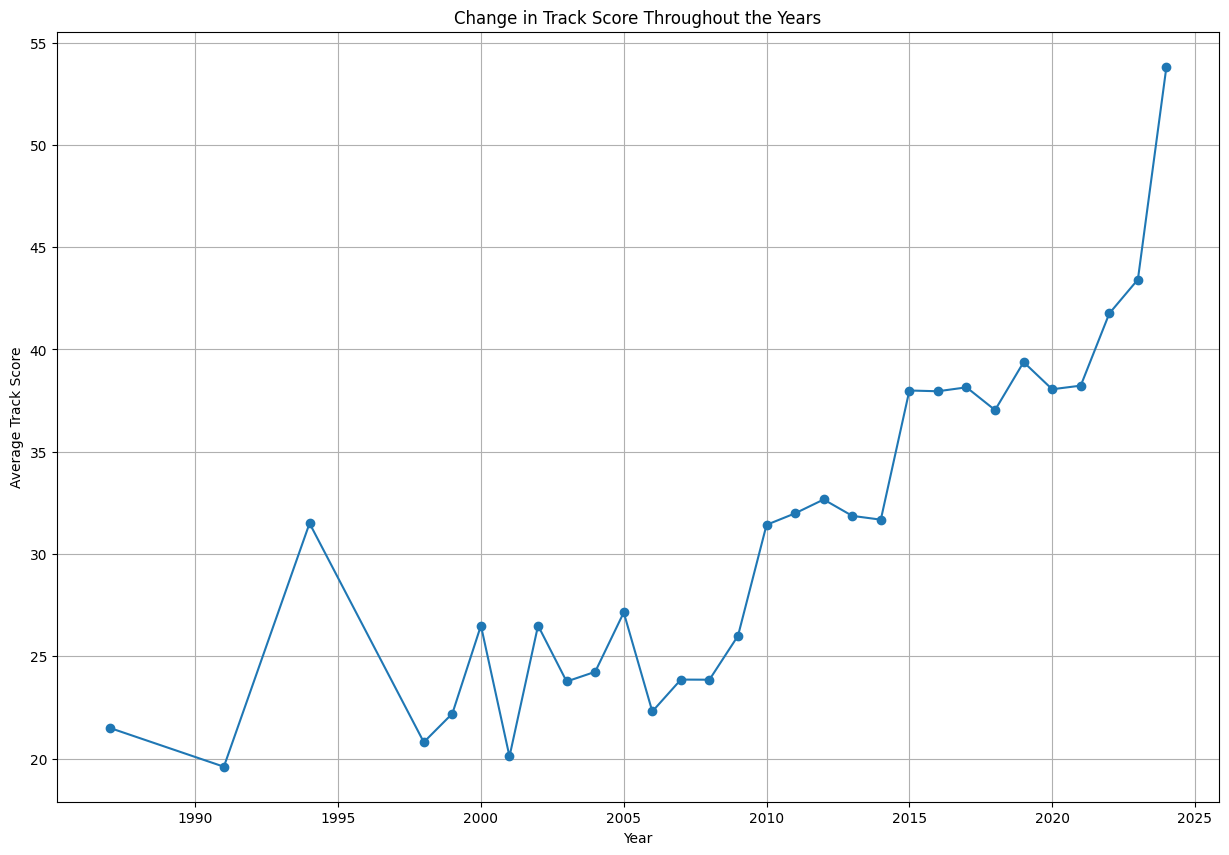

In [77]:
# Group by 'Year' and calculate the average 'Track Score' for each year
avg_track_score_per_year = df.groupby('Year')['Track_Score'].mean()

plt.figure(figsize=(15, 10))
avg_track_score_per_year.plot(kind='line', marker='o')
plt.title('Change in Track Score Throughout the Years')
plt.xlabel('Year')
plt.ylabel('Average Track Score')
plt.grid(True)
plt.show()

### 2 The best Track Score for each year

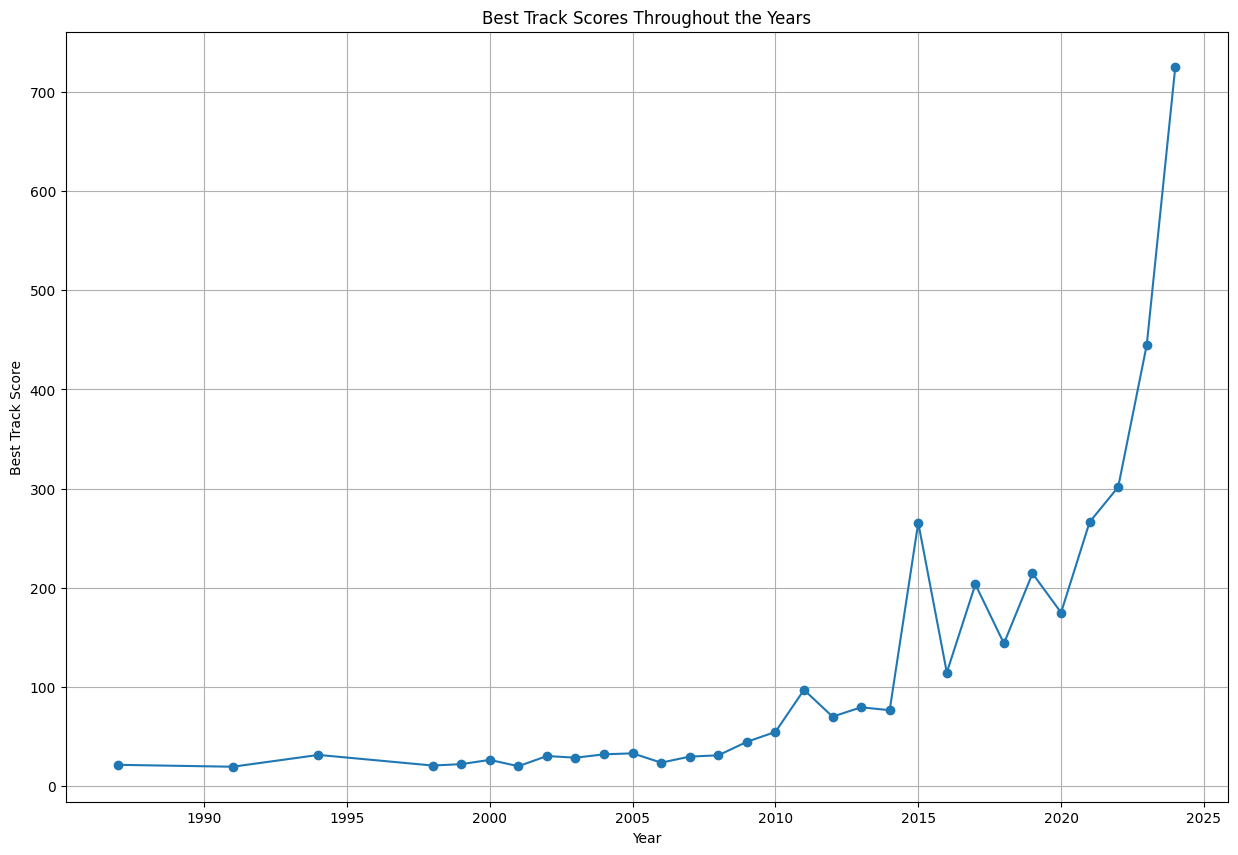

In [78]:
# Group by 'Year' and get the best 'Track Score' for each year
best_track_score_per_year = df.groupby('Year')['Track_Score'].max()

plt.figure(figsize=(15, 10))
best_track_score_per_year.plot(kind='line', marker='o')
plt.title('Best Track Scores Throughout the Years')
plt.xlabel('Year')
plt.ylabel('Best Track Score')
plt.grid(True)
plt.show()

### 3 The worst Track Score for each year

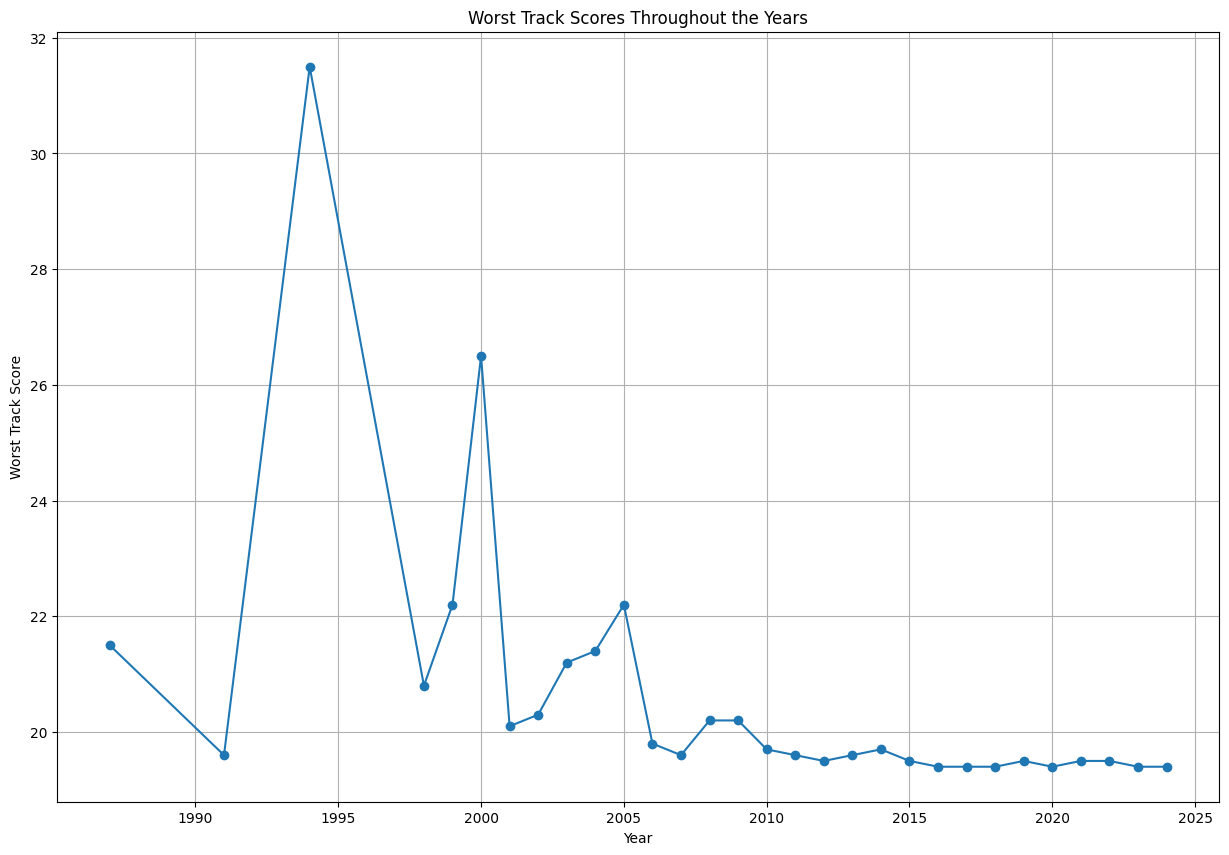

In [79]:
# Group by 'Year' and get the worst 'Track Score' for each year
worst_track_score_per_year = df.groupby('Year')['Track_Score'].min()

plt.figure(figsize=(15, 10))
worst_track_score_per_year.plot(kind='line', marker='o')
plt.title('Worst Track Scores Throughout the Years')
plt.xlabel('Year')
plt.ylabel('Worst Track Score')
plt.grid(True)
plt.show()

### 4 Number of Tracks every Year

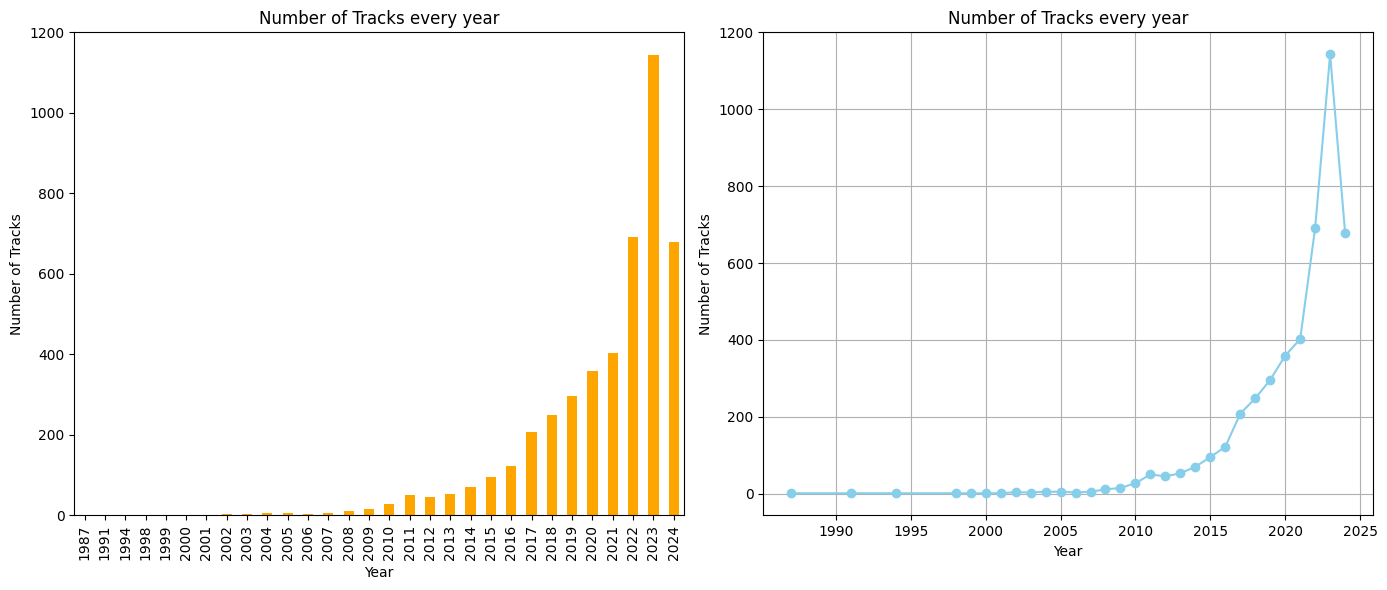

In [80]:
# Group by 'Year' and get the number of Tracks for each year
tracks_per_year = df.groupby('Year')['Track'].count()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Bar Chart
tracks_per_year.plot(kind='bar', ax=axes[0], color='orange')
axes[0].set_title('Number of Tracks every year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Tracks')

# Line Chart
tracks_per_year.plot(kind='line', ax=axes[1], color='skyblue', marker='o')
axes[1].set_title('Number of Tracks every year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Tracks')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### 5 Interest in Explicit Music

<ipython-input-81-5e9c47589a0a>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



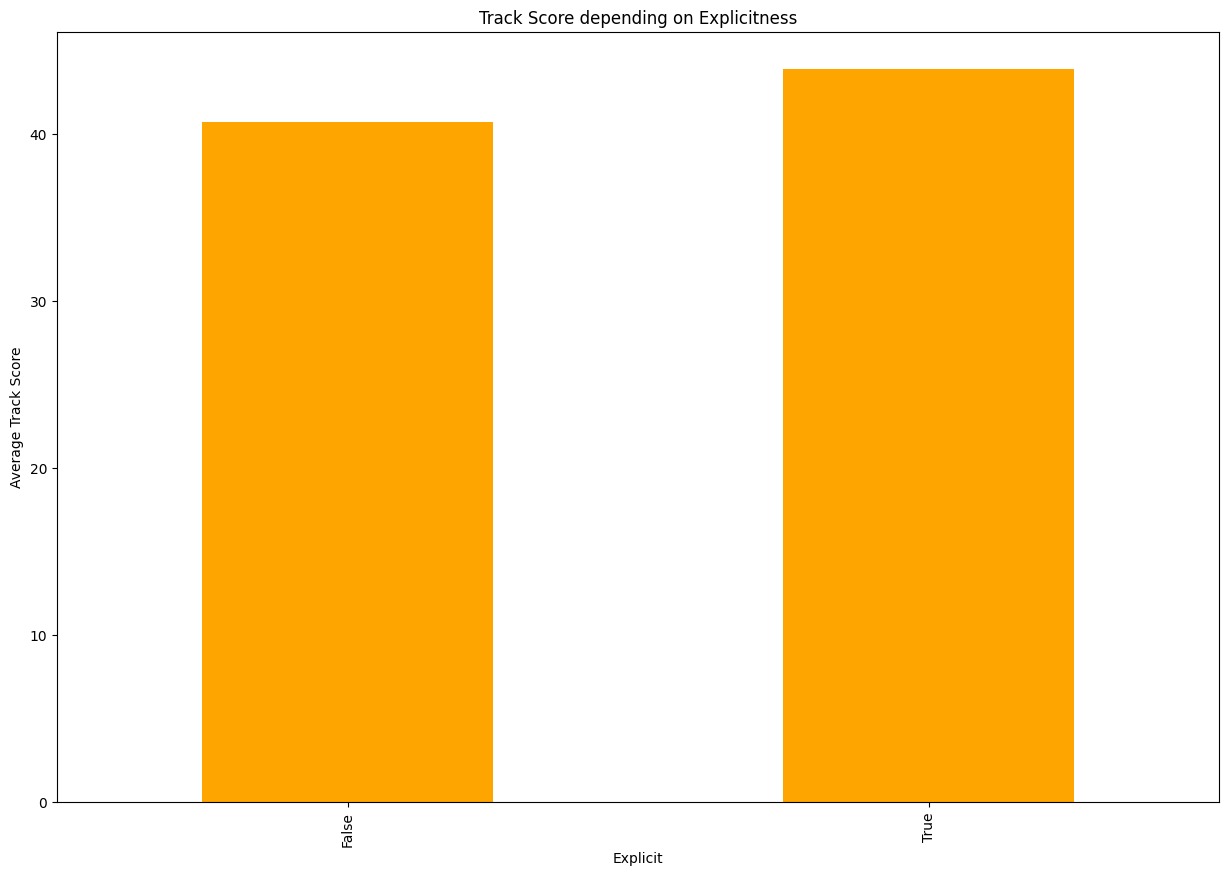

In [81]:
# Calculate the average 'Track Score' based on Explicitness
explicit_track_scores = df.groupby('Explicit_Track')['Track_Score'].mean()

plt.figure(figsize=(15, 10))
explicit_track_scores.plot(kind='bar', color='orange')
plt.title('Track Score depending on Explicitness')
plt.xlabel('Explicit')
plt.ylabel('Average Track Score')
plt.show()

### 6 Change in Explicitness throughout the Years

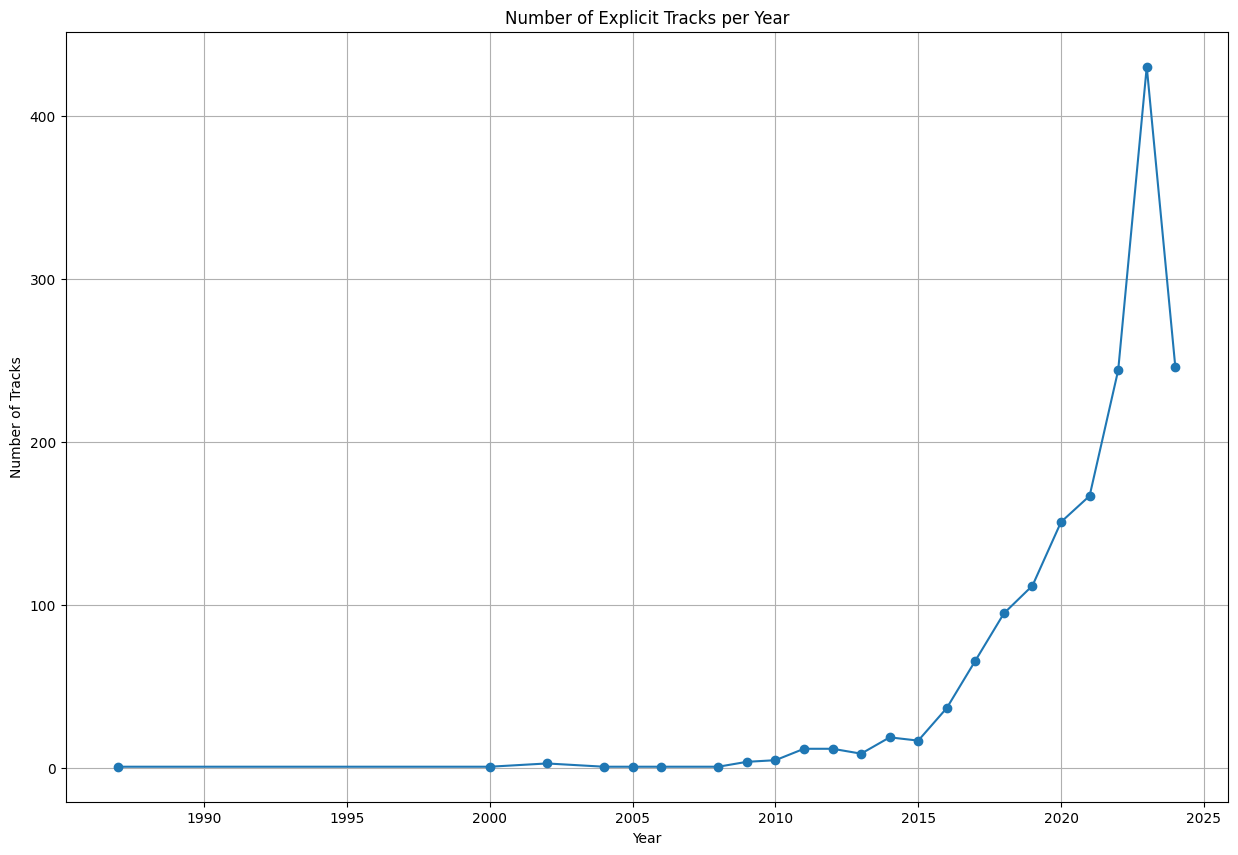

In [82]:
# Group by 'Year' and calculate the number of Explicit Tracks for each year
explicit_tracks = df[df['Explicit_Track'] == True]
explicit_tracks_per_year = explicit_tracks.groupby('Year')['Track'].count()

plt.figure(figsize=(15, 10))
explicit_tracks_per_year.plot(kind='line', marker='o')
plt.title('Number of Explicit Tracks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()

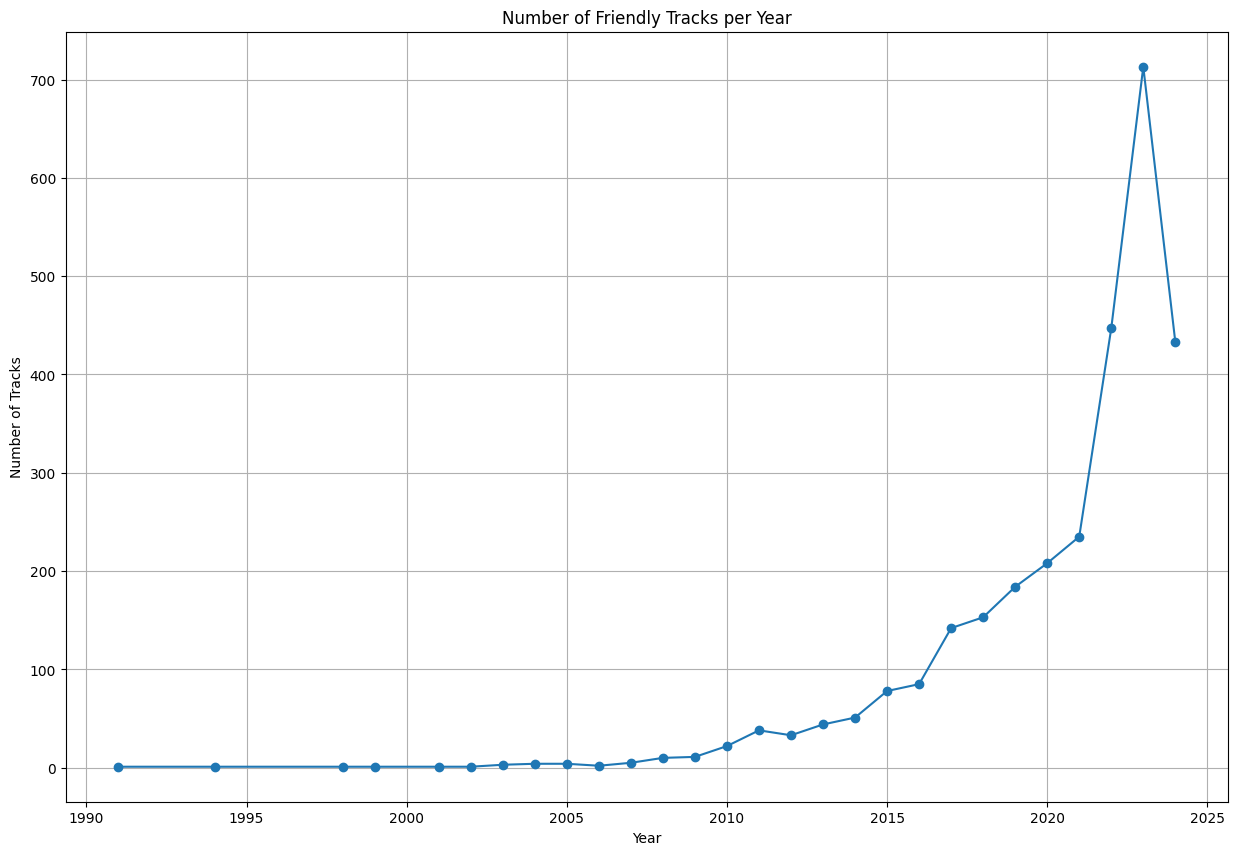

In [83]:
# Group by 'Year' and calculate the number of Explicit Tracks for each year
friendly_tracks = df[df['Explicit_Track'] == False]
friendly_tracks_per_year = friendly_tracks.groupby('Year')['Track'].count()

plt.figure(figsize=(15, 10))
friendly_tracks_per_year.plot(kind='line', marker='o')
plt.title('Number of Friendly Tracks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()

Explicitness do not contribute to track scores and popularity

## Spotify Analysis

In [84]:
artist = list(df['Artist'].head(20)[::-1])
streams = list(df['Spotify_Streams'].head(20)[::-1])
streams = ["{:,.0f}".format(x) for x in streams]

fig = px.bar(df.head(20)[::-1], x='Spotify_Streams', y='Track', text=[f"{x}: {y}" for x,y in list(zip(artist,streams))],
             color='Explicit_Track',
             title='<b>Top 20 Ranked Songs on Spotify</b><br><sub>(2006 - 2024)</sub>',
             height=900, width=1100)
fig.update_layout(title_x=0.57, yaxis={'categoryorder':'array', 'categoryarray':df['Track'].head(20)[::-1]})
fig.show()

In [85]:
spotifyStreams = df.copy()
spotifyStreams.sort_values(by='Spotify_Streams', ascending=False, inplace=True)
spotifyStreams = spotifyStreams.loc[spotifyStreams['Track'].shift() != spotifyStreams['Track']]

artist = list(spotifyStreams['Artist'].head(20)[::-1])
streams = list(spotifyStreams['Spotify_Streams'].head(20)[::-1])
streams = ["{:,.0f}".format(x) for x in streams]

fig = px.bar(spotifyStreams.head(20)[::-1], x='Spotify_Streams', y='Track', text=[f"{x}: {y}" for x,y in list(zip(artist,streams))],
             color='Explicit_Track',
             title='<b>Top 20 Streamed Songs on Spotify</b><br><sub>(2006 - 2024)</sub>',
             height=900, width=1100)
fig.update_layout(title_x=0.57, yaxis={'categoryorder':'array', 'categoryarray':spotifyStreams['Track'].head(20)[::-1]})
fig.update_traces(textfont_color="white")
fig.show()

#### As you can see Spotify's popularity score is based more on recent streams than total amount of streams.

## YouTube Analysis

In [86]:
youtubeViews = df.copy()
youtubeViews.sort_values(by='YouTube_Views',ascending=False,inplace=True)

artist = list(youtubeViews.head(20)['Artist'][::-1])
views = list(youtubeViews.head(20)['YouTube_Views'][::-1])
views = ["{:,.0f}".format(x) for x in views]

fig = px.bar(youtubeViews.head(20)[::-1], x='YouTube_Views', y='Track', text=[f'{x}: {y}' for x, y in list(zip(artist,views))],
             color='Explicit_Track',
             title='<b>Top 20 most viewed video on YouTube</b><br><sub>(2006 - 2024)</sub>',
             height=900, width=1100)
fig.update_layout(title_x=0.5, yaxis={'categoryorder':'array', 'categoryarray':youtubeViews['Track'].head(20)[::-1]})
fig.show()

In [87]:
youtubeLikes = df.copy()
youtubeLikes.sort_values(by='YouTube_Likes',ascending=False,inplace=True)

artist = list(youtubeLikes.head(20)['Artist'][::-1])
likes = list(youtubeLikes.head(20)['YouTube_Likes'][::-1])
likes = ["{:,.0f}".format(x) for x in likes]

fig = px.bar(youtubeLikes.head(20)[::-1], x='YouTube_Likes', y='Track', text=[f'{x}: {y}' for x,y in list(zip(artist, likes))],
            color='Explicit_Track',
            title='<b>Top 20 most liked video on YouTube</b><br><sub>(2006 - 2024)</sub>',
            height=900, width=1100)
fig.update_layout(title_x=0.5, yaxis={'categoryorder':'array', 'categoryarray':youtubeLikes['Track'].head(20)[::-1]})
fig.update_traces(textfont_color="white")
fig.show()

## TikTok Analysis

In [88]:
tiktokViews = df.copy()
tiktokViews.sort_values(by='TikTok_Views',ascending=False,inplace=True)

artist = list(tiktokViews.head(20)['Artist'][::-1])
views = list(tiktokViews.head(20)['TikTok_Views'][::-1])
views = ["{:,.0f}".format(x) for x in views]

fig = px.bar(tiktokViews.head(20)[::-1], x='TikTok_Views', y='Track', text=[f'{x}: {y}' for x,y in list(zip(artist, likes))],
            color='Explicit_Track',
            title='<b>Top 20 most used songs on TikTok</b><br><sub>(2006 - 2024)</sub>',
            height=900, width=1100)
fig.update_layout(title_x=0.5, yaxis={'categoryorder':'array', 'categoryarray':tiktokViews['Track'].head(20)[::-1]})
fig.show()

## Shazam Analysis

In [89]:
shazamCount = df.copy()
shazamCount.sort_values(by='Shazam_Counts', ascending=False, inplace=True)

artist = list(shazamCount['Artist'].head(20)[::-1])
count = list(shazamCount['Shazam_Counts'].head(20)[::-1])
count = ['{:,.0f}'.format(x) for x in count]

fig = px.bar(shazamCount.head(20)[::-1], x='Shazam_Counts', y='Track', text=[f'{x}: {y}' for x,y in list(zip(artist, count))],
             color='Explicit_Track',
             title='<b>Top 20 most searched songs on Shazam</b><br><sub>(2006 - 2024)</sub>',
             height=900, width=1100)
fig.update_layout(title_x=0.5, yaxis={'categoryorder':'array', 'categoryarray':shazamCount['Track'].head(20)[::-1]})
fig.show()

## Most Popular Artist

In [90]:
spotifyPop = df.groupby('Artist')['Spotify_Streams'].sum().reset_index()
spotifyPop.sort_values(by='Spotify_Streams', ascending=False, inplace=True)

streams = list(spotifyPop['Spotify_Streams'].head(20)[::-1])
streams = ['{:,.0f}'.format(x) for x in streams]

fig = px.bar(spotifyPop.head(20)[::-1], x='Spotify_Streams', y='Artist', text=streams,
             title='<b>Top 20 most popular artist</b><br><sub>From Spotify streams</sub>',
             height=900, width=1100)
fig.update_layout(title_x=0.5)
fig.show()

In [91]:
youtubePop = df.groupby('Artist')[['YouTube_Views', 'Spotify_Streams']].sum().reset_index()
youtubePop.sort_values(by='YouTube_Views', ascending=False, inplace=True)

views = list(youtubePop['YouTube_Views'].head(20)[::-1])
views = ['{:,.0f}'.format(x) for x in views]

fig = px.bar(youtubePop.head(20)[::-1], x='YouTube_Views', y='Artist', text=views,
             title='<b>Top 20 most popular artist</b><br><sub>From YouTube views</sub>',
             height=900, width=1100)
fig.update_layout(title_x=0.5)
fig.show()

In [92]:
total_plays = df.groupby('Artist').agg(Spotify_Streams=('Spotify_Streams', 'sum'), YouTube_Views=('YouTube_Views', 'sum')).reset_index()
total_plays['Total_Plays'] = total_plays['Spotify_Streams'] + total_plays['YouTube_Views']

spotify = df.groupby('Artist')['Spotify_Streams'].sum().reset_index()
spotify.rename(columns={'Spotify_Streams': 'Plays'}, inplace=True)
spotify['Media'] = 'Spotify'
spotify['Total_Plays'] = total_plays['Total_Plays']

youtube = df.groupby('Artist')['YouTube_Views'].sum().reset_index()
youtube.rename(columns={'YouTube_Views': 'Plays'}, inplace=True)
youtube['Media'] = 'YouTube'
youtube['Total_Plays'] = total_plays['Total_Plays']

spot_yout = pd.concat([spotify, youtube])
spot_yout.sort_values(by='Total_Plays', ascending=False, inplace=True)

media = list(spot_yout['Media'].head(40)[::-1])
plays = list(spot_yout['Plays'].head(40)[::-1])
plays = ['{:,.0f}'.format(x) for x in plays]

fig = px.bar(spot_yout.head(40)[::-1], x='Plays', y='Artist', color='Media', text=plays,
             title='<b>Top 20 most popular artist</b><br><sub>From Spotify and YouTube plays</sub>',
             height=900, width=1100, color_discrete_sequence=['#1DB954','#d94848'])
fig.update_layout(title_x=0.5)
fig.update_traces(textfont_color="white")
fig.show()

## Choose Artist to Analyze

In [93]:
def choose_artist():
    artist = input('Choose an artist:')
    artist_df = df[df['Artist'].str.lower().str.contains(artist.lower(), regex=False)].reset_index()
    artist_array = artist_df['Artist'].unique()

    if len(artist_array) > 1:
        return get_artist(artist_array)
    else:
        return artist_array[0]

def get_artist(arr):
    print('Which artist did you mean?')

    for x, y in enumerate(arr):
        print(f'{x}: {y}')

    answer = int(input('Pick artist by number:'))
    artist = arr[answer]
    return artist

In [94]:
#  Uncomment to be able to run the choose your artist method

# input function not working on kaggle but does work on jupyter
artist = choose_artist()
# artist = 'Taylor Swift'
artist_df = df[df['Artist'] == artist]
top_spo = artist_df.sort_values('Spotify_Streams', ascending=False)
top_you = artist_df.sort_values('YouTube_Views', ascending=False)
top_tik = artist_df.sort_values('TikTok_Views', ascending=False)
top_sha = artist_df.sort_values('Shazam_Counts', ascending=False)

artist_df = artist_df.sort_values('Release_Date', ascending=True)
month = list(artist_df['Month'])
year = list(artist_df['Year'])

figbar = make_subplots(rows=2,cols=2, subplot_titles=('Top streamed hits<br><sub>Spotify</sub>',  'Most watched music video<br><sub>Youtube</sub>',
                                                   'Top used songs<br><sub>TikTok</sub>', 'Top searched songs<br><sub>Shazam</sub>'))
bar1 = go.Bar(x=top_spo['Track'][:10], y=top_spo['Spotify_Streams'], name='listens', marker_color='#1DB954')
bar2 = go.Bar(x=top_you['Track'][:10], y=top_you['YouTube_Views'][:10], name='views', marker_color='#d94848')
bar3 = go.Bar(x=top_tik['Track'][:10], y=top_tik['TikTok_Views'][:10], name='memes', marker_color='#F1C40F')
bar4 = go.Bar(x=top_sha['Track'][:10], y=top_sha['Shazam_Counts'][:10], name='search', marker_color='#486fd9')
figbar.add_trace(bar1,row=1,col=1)
figbar.add_trace(bar2,row=1,col=2)
figbar.add_trace(bar3,row=2,col=1)
figbar.add_trace(bar4,row=2,col=2)
figbar.update_layout(height=1000, width=1100, title_text=f"{artist} Analysis",title_x=0.5)

figline = make_subplots(rows=1,cols=2, subplot_titles=('Spotify Score 2024',  'Total Spotify Streams'))
line1 = go.Scatter(x=artist_df['Track'], y=artist_df['Track_Score'], text=[f'{x}, {y}' for x,y in list(zip(month,year))], name='Track Score', marker_color='#1DB954')
line2 = go.Scatter(x=artist_df['Track'], y=artist_df['Spotify_Streams'], text=[f'{x}, {y}' for x,y in list(zip(month,year))],name='Streams', marker_color='#d94848')
figline.add_trace(line1,row=1,col=1)
figline.add_trace(line2,row=1,col=2)
figline.update_layout(height=800, width=1100, title_text=f"{artist} Song Popularity by Release Date",
                  title_x=0.48,hovermode="x unified")
figbar.show()
figline.show()

Choose an artist:Taylor


# Conclusion

Song usage is very different for each social media platform. Not all songs are popular accross all platforms. Spotify top's songs usually have captivating rhythm or meaningful / catchy lyrics, while
YouTube often highlight songs that stand out due to their visually compelling music videos. However, what I find particularly interesting is the way TikTok utilizes music. On this platform, songs are frequently chosen not for their inherent artistic qualities, but for their ability to enhance video content—whether through a distinctive sound or lyrics that perfectly align with a creator’s skit or narrative.